In [128]:
import pandas as pd

In [129]:
df = pd.read_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\Exploratory_Data_Analysis\ingredients.csv', sep='\t', encoding='latin-1')


C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_23932\2071597282.py:1: DtypeWarning:

Columns (4,5,6,17) have mixed types. Specify dtype option on import or set low_memory=False.



In [130]:
df.head()

,Code produit,Secteur,Famille,Code barre,Marque,Nom du produit,Dénomination de vente,Année de collecte la plus récente,Ingrédient,Type d'ingrédient,Source ingredients,Unité d'expression,Unité de mesure,Parent,Quantité,Rang,Ordre de saisie,Wording
0,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,NaN,NaN,NaN,NaN,2007,lait ecreme reconstitue,_,Autres donnees emballage,_,_,NaN,NaN,1,1,NaN
1,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,NaN,NaN,NaN,NaN,2007,sucre,_,Autres donnees emballage,_,%,NaN,10.8,2,2,NaN
2,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,NaN,NaN,NaN,NaN,2007,fruit : framboise,_,Autres donnees emballage,_,%,NaN,6.0,3,3,NaN
3,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,NaN,NaN,NaN,NaN,2007,creme,_,Autres donnees emballage,_,_,NaN,NaN,4,4,NaN
4,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,NaN,NaN,NaN,NaN,2007,"epaississants : amidon transforme de mais, gom...",_,Autres donnees emballage,_,_,NaN,NaN,5,5,NaN


In [13]:
df = df[["Code produit", "Secteur", "Ingrédient"]]
df.rename(columns={ 'Code produit': 'Code_produit' })
df.to_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\Exploratory_Data_Analysis\clean.csv')

In [14]:
df = df.rename(columns={ 'Code produit': 'Code_produit' })

In [2]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\Exploratory_Data_Analysis\simply_clean.csv')

In [3]:
df = df[["Code produit", "Secteur", "Ingrédient"]]
df = df.rename(columns={ 'Code produit': 'Code_produit' })
df.head()

,Code_produit,Secteur,Ingrédient
0,450,Produits laitiers et desserts frais,lait ecreme reconstitue
1,450,Produits laitiers et desserts frais,sucre
2,450,Produits laitiers et desserts frais,fruit
3,450,Produits laitiers et desserts frais,creme
4,450,Produits laitiers et desserts frais,epaississants


In [4]:
df

,Code_produit,Secteur,Ingrédient
0,450,Produits laitiers et desserts frais,lait ecreme reconstitue
1,450,Produits laitiers et desserts frais,sucre
2,450,Produits laitiers et desserts frais,fruit
3,450,Produits laitiers et desserts frais,creme
4,450,Produits laitiers et desserts frais,epaississants
...,...,...,...
1048570,72342,Bouillons et potages_RHF,asperge blanche
1048571,72342,Bouillons et potages_RHF,asperge verte
1048572,72342,Bouillons et potages_RHF,oignon
1048573,72342,Bouillons et potages_RHF,epinard


In [5]:
df['Ingrédient'] = df['Ingrédient'].apply(lambda x : x.replace(' ','_'))

In [6]:
df = df.groupby(['Code_produit', 'Secteur'])['Ingrédient'].agg(lambda col: ' '.join(col)).reset_index(name='Ingrédient')

In [144]:
df

,Code_produit,Secteur,Ingrédient
0,450,Produits laitiers et desserts frais,lait_ecreme_reconstitue sucre fruit creme epai...
1,453,Produits laitiers et desserts frais,yaourt_au_lait_partiellement_ecreme sucre siro...
2,455,Produits laitiers et desserts frais,"yaourt_au_lait_1,1%_mg sucre fruits fruit frui..."
3,456,Produits laitiers et desserts frais,"yaourt_au_lait_1,1%_mg sucre fraise fructose c..."
4,460,Produits laitiers et desserts frais,lait_ecreme_pasteurise creme_pasteurisee ferme...
...,...,...,...
46745,72338,Compotes,puree_de_pommes sucre antioxydant
46746,72339,Compotes,puree_de_pommes puree_de_fraises sucre puree_d...
46747,72340,Compotes,puree_de_pommes puree_de_poires sucre antioxydant
46748,72341,Compotes,puree_de_pommes puree_d_abricots sucre antioxy...


In [124]:
def f(x):
     return pd.Series(dict(Ingrédient = "['%s']" % "', '".join(x['Ingrédient'])))

In [133]:
def f(x):
     return pd.Series(dict(Ingrédient = ", ".join(x['Ingrédient'])))

In [134]:
df = df.groupby(['Code_produit', 'Secteur']).apply(f).reset_index()

In [135]:
df

,Code_produit,Secteur,Ingrédient
0,450,Produits laitiers et desserts frais,"lait ecreme reconstitue, sucre, fruit, creme, ..."
1,453,Produits laitiers et desserts frais,"yaourt au lait partiellement ecreme, sucre, si..."
2,455,Produits laitiers et desserts frais,"yaourt au lait 1,1% mg, sucre, fruits, fruit, ..."
3,456,Produits laitiers et desserts frais,"yaourt au lait 1,1% mg, sucre, fraise, fructos..."
4,460,Produits laitiers et desserts frais,"lait ecreme pasteurise, creme pasteurisee, fer..."
...,...,...,...
46745,72338,Compotes,"puree de pommes, sucre, antioxydant"
46746,72339,Compotes,"puree de pommes, puree de fraises, sucre, pure..."
46747,72340,Compotes,"puree de pommes, puree de poires, sucre, antio..."
46748,72341,Compotes,"puree de pommes, puree d_abricots, sucre, anti..."


In [56]:
df.iloc[0,0]

'{lait ecreme reconstitue, sucre, fruit, creme, epaississants, epaississant, epaississant, colorant, mineraux du lait, jus concentre de sureau, aromes, ferments lactiques du yaourt, vitamine B2, vitamine B12, vitamine D}'

In [ ]:
df

In [105]:
df.groupby('Code_produit')['Ingrédient'].apply(lambda x: "[%s]" % ', '.join(x))

Code_produit
450      [lait ecreme reconstitue, sucre, fruit, creme,...
453      [yaourt au lait partiellement ecreme, sucre, s...
455      [yaourt au lait 1,1% mg, sucre, fruits, fruit,...
456      [yaourt au lait 1,1% mg, sucre, fraise, fructo...
460      [lait ecreme pasteurise, creme pasteurisee, fe...
                               ...                        
72338                [puree de pommes, sucre, antioxydant]
72339    [puree de pommes, puree de fraises, sucre, pur...
72340    [puree de pommes, puree de poires, sucre, anti...
72341    [puree de pommes, puree d_abricots, sucre, ant...
72342    [farine de ble, amidon de mais, graisse de pal...
Name: Ingrédient, Length: 46750, dtype: object

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46750 entries, 0 to 46749
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Code_produit  46750 non-null  int64 
 1   Secteur       46750 non-null  object
 2   Ingrédient    46750 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [91]:
df

,Code_produit,Secteur,Ingrédient
0,450,Produits laitiers et desserts frais,"{lait ecreme reconstitue, sucre, fruit, creme,..."
1,453,Produits laitiers et desserts frais,"{yaourt au lait partiellement ecreme, sucre, s..."
2,455,Produits laitiers et desserts frais,"{yaourt au lait 1,1% mg, sucre, fruits, fruit,..."
3,456,Produits laitiers et desserts frais,"{yaourt au lait 1,1% mg, sucre, fraise, fructo..."
4,460,Produits laitiers et desserts frais,"{lait ecreme pasteurise, creme pasteurisee, fe..."
...,...,...,...
46745,72338,Compotes,"{puree de pommes, sucre, antioxydant}"
46746,72339,Compotes,"{puree de pommes, puree de fraises, sucre, pur..."
46747,72340,Compotes,"{puree de pommes, puree de poires, sucre, anti..."
46748,72341,Compotes,"{puree de pommes, puree d_abricots, sucre, ant..."


In [92]:
print("Number of products: {}".format(len(df.Code_produit.unique())))
df.Code_produit.unique()


Number of products: 46750


array([  450,   453,   455, ..., 72340, 72341, 72342], dtype=int64)

In [93]:
print("Number of sectors: {}".format(len(df.Secteur.unique())))
df.Secteur.unique()

Number of sectors: 33


array(['Produits laitiers et desserts frais', 'Jus et nectars',
       'Compotes', 'Conserves de fruits', 'Confitures',
       'Boissons Rafraichissantes Sans Alcool',
       'Cereales pour le petit dejeuner',
       'Biscuits et gateaux industriels',
       'Chocolat et produits chocolates',
       'Panification croustillante et moelleuse', 'Aperitifs a croquer',
       'Preparations pour desserts', 'Plats cuisines frais',
       'Produits traiteurs frais',
       'Produits transformes a base de pomme de terre', 'Charcuterie',
       'Sirops et boissons concentrees a diluer', 'Snacking surgele',
       'Plats cuisines surgeles', 'Sauces condimentaires',
       'Glaces et sorbets', 'Bouillons et potages', 'Sauces chaudes',
       'Plats cuisines ambiants', 'Barres cerealieres',
       'Bouillons et potages_RHF', 'Sauces condimentaires_RHF',
       'Margarines', 'Laits infantiles',
       'Aliments infantiles de diversification', 'Fromages',
       'Viennoiseries et desserts surgeles', 

In [94]:
print("Number of ingredients: {}".format(len(df.Ingrédient.unique())))
df.Ingrédient.unique()

Number of ingredients: 39985


array(['{lait ecreme reconstitue, sucre, fruit, creme, epaississants, epaississant, epaississant, colorant, mineraux du lait, jus concentre de sureau, aromes, ferments lactiques du yaourt, vitamine B2, vitamine B12, vitamine D}',
       '{yaourt au lait partiellement ecreme, sucre, sirop de glucose_fructose, arome, concentre des mineraux du lait, colorant}',
       '{yaourt au lait 1,1% mg, sucre, fruits, fruit, fruit, fructose, amidon modifie, epaississants, epaississant, epaississant, concentre des mineraux du lait, aromes, vitamine D}',
       ...,
       '{vermicelle, sel, exhausteurs, exhausteur, exhausteur, exhausteur, maltodextrine, viande de poule, graisse de poule, aromes, legumes, oignon, carotte, graisse de palme, extrait de levure, epices, persil, curcuma, poivre, acidifiant, antioxydant, lait, oeuf, celeri, moutarde}',
       '{pomme de terre, legumes, carotte, tomate, oignon, haricot vert, poireau, amidon de mais, sel, exhausteur, aromes, epices, curcuma, graines de celer

In [29]:


#Define a function to generate randoms colors for further visualizations
def random_colours(number_of_colors):
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors



In [95]:
df.shape

(46750, 3)

In [96]:
resultat = df.Ingrédient.value_counts()
resultat


Ingrédient
{jus d_orange}                                                                                                                                                                                                                                                                                                                                   131
{saumon, sel}                                                                                                                                                                                                                                                                                                                                     95
{jambon de porc, sel, conservateur}                                                                                                                                                                                                                                                                                

Certains ingrédients sont présents un grand nombre de fois

In [12]:
resultat = df.Secteur.value_counts()
resultat


Secteur
Plats cuisines surgeles                          136939
Glaces et sorbets                                119105
Produits traiteurs frais                         119038
Biscuits et gateaux industriels                   86057
Plats cuisines frais                              79442
Snacking surgele                                  65056
Plats cuisines ambiants                           60958
Produits laitiers et desserts frais               47927
Charcuterie                                       36008
Panification croustillante et moelleuse           27010
Aperitifs a croquer                               26932
Bouillons et potages                              24801
Chocolat et produits chocolates                   23725
Viennoiseries et desserts surgeles                23459
Sauces condimentaires                             22229
Boissons Rafraichissantes Sans Alcool             21075
Cereales pour le petit dejeuner                   19044
Aliments infantiles de diversification  

Tous les secteurs ne sont pas autant représentés dans la base de données
Certains secteurs sont présent 136 939 fois, d'autres 129 fois.

In [13]:
resultat = df.Code_produit.value_counts()
resultat[40000:46750]

Code_produit
55289    6
42970    6
56819    6
10993    6
56896    6
        ..
6825     1
10820    1
53215    1
10814    1
53873    1
Name: count, Length: 6750, dtype: int64

shape: (46750, 3)
unique Sector count: 33


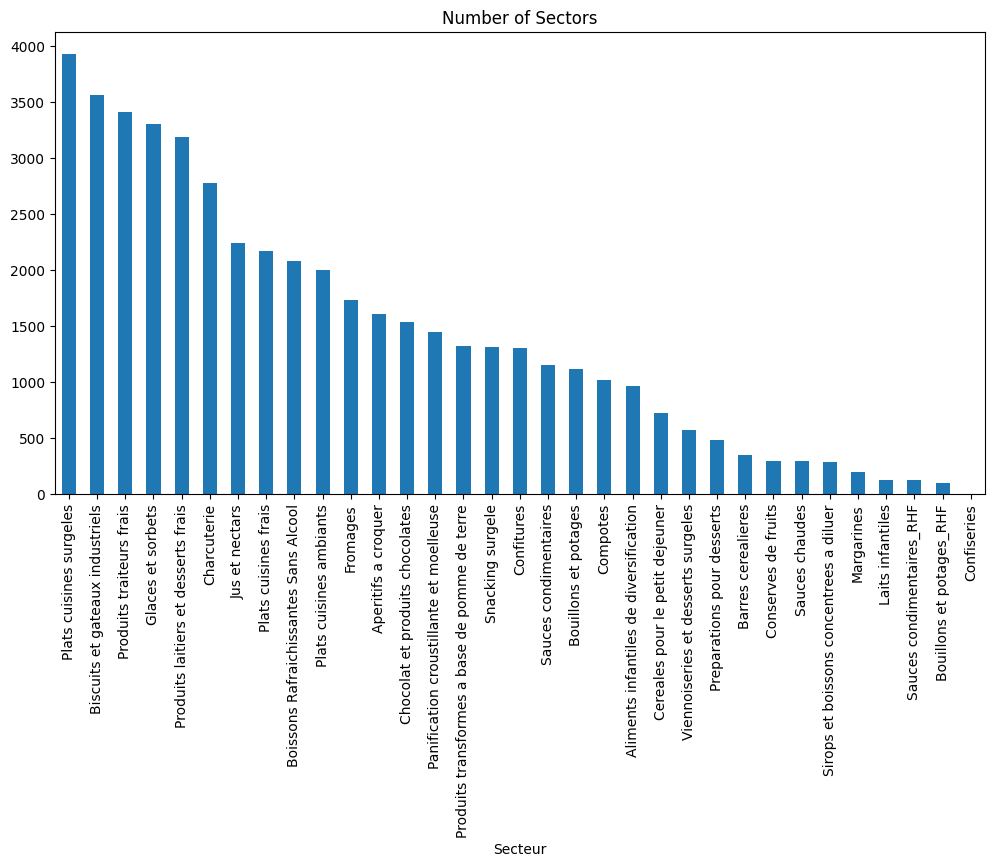

In [97]:
cuisines = df.Secteur.value_counts(sort=True)
cuisines.plot(kind="bar", figsize=(12,6), title="Number of Sectors")
print("shape:", df.shape)
print("unique Sector count:", len(df.Secteur.unique()))

In [30]:
import plotly.graph_objs as go

In [100]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 

trace = go.Table(
                header=dict(values=['Cuisine','Number of recipes'],
                fill = dict(color=['#EABEB0']), 
                align = ['left'] * 5),
                cells=dict(values=[df.Secteur.value_counts().index,df.Secteur.value_counts()],
                align = ['left'] * 5))

layout = go.Layout(title='Number of recipes in each cuisine category',
                   titlefont = dict(size = 20),
                   width=500, height=650, 
                   paper_bgcolor =  'rgba(0,0,0,0)',
                   plot_bgcolor = 'rgba(0,0,0,0)',
                   autosize = False,
                   margin=dict(l=30,r=30,b=1,t=50,pad=1),
                   )
data = [trace]
fig = dict(data=data, layout=layout)
iplot(fig)

In [15]:
from collections import Counter, defaultdict

# calculating the usage of each ingredient, and for each sector
cuisine_dict = defaultdict(Counter)
index_dict = defaultdict(Counter)
total_counter = Counter()
# iterate each row
for index, row in df.iterrows():
    #print("index", index)
    #print("row", row)
    # get the counters
    row_counter = index_dict[row.Code_produit] 
    local_counter = cuisine_dict[row.Secteur]
    # count the ingredients usage
    arr = row.Ingrédient
    #print("arr", arr)
    key = arr.lower()
    # increment each word count
    total_counter[key] += 1
    local_counter[key] += 1
    row_counter[key] += 1
    # update the counters
    cuisine_dict[row.Secteur] = local_counter
    index_dict[row.Code_produit] = row_counter

<generator object DataFrame.iterrows at 0x000002A435B03890>

<Axes: title={'center': '10 Most Common Ingredients'}, xlabel='Ingrédient'>

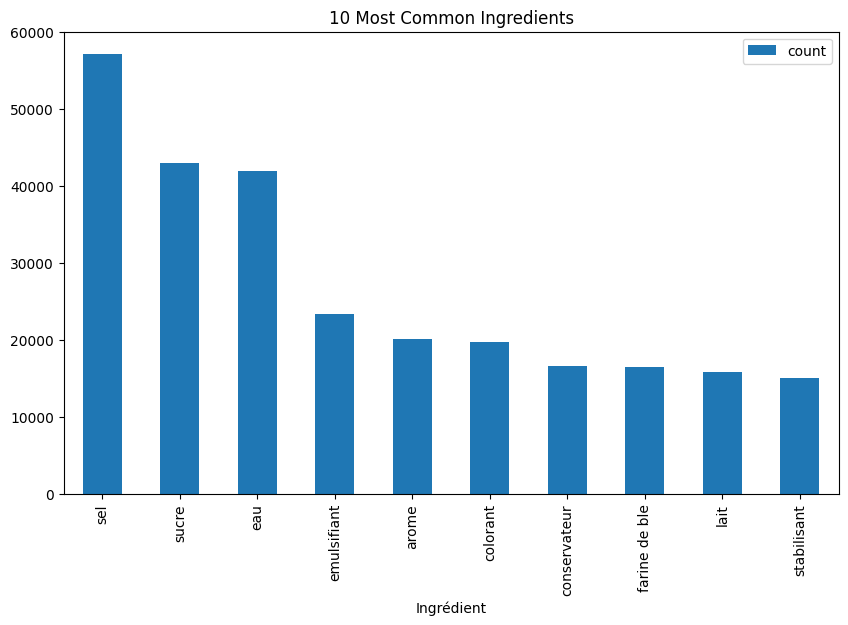

In [16]:
# plotting most common ingredients
most_common_ingredients = pd.DataFrame(total_counter.most_common(10), columns=["Ingrédient", "count"])
most_common_ingredients.plot(kind="bar", x="Ingrédient", figsize=(10,6), title="10 Most Common Ingredients")

In [22]:
from wordcloud import WordCloud

wordcloudobj = WordCloud( background_color='white')
wordcloud = wordcloudobj.generate_from_frequencies(total_counter.most_common(100))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most common ingredients")
plt.show()

AttributeError: 'list' object has no attribute 'items'

In [23]:
for key, value in cuisine_dict.items():
    wc = wordcloudobj.generate_from_frequencies(value.most_common(100))
    plt.imshow(wc)
    plt.title("100 most common ingredients for '%s' cuisine" % key)
    plt.axis("off")
    plt.show()

AttributeError: 'list' object has no attribute 'items'

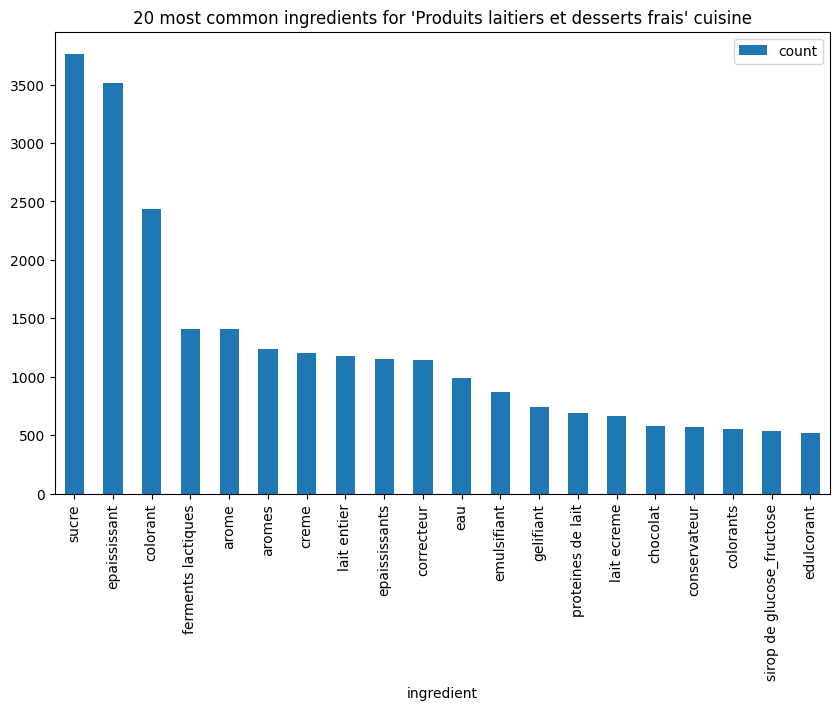

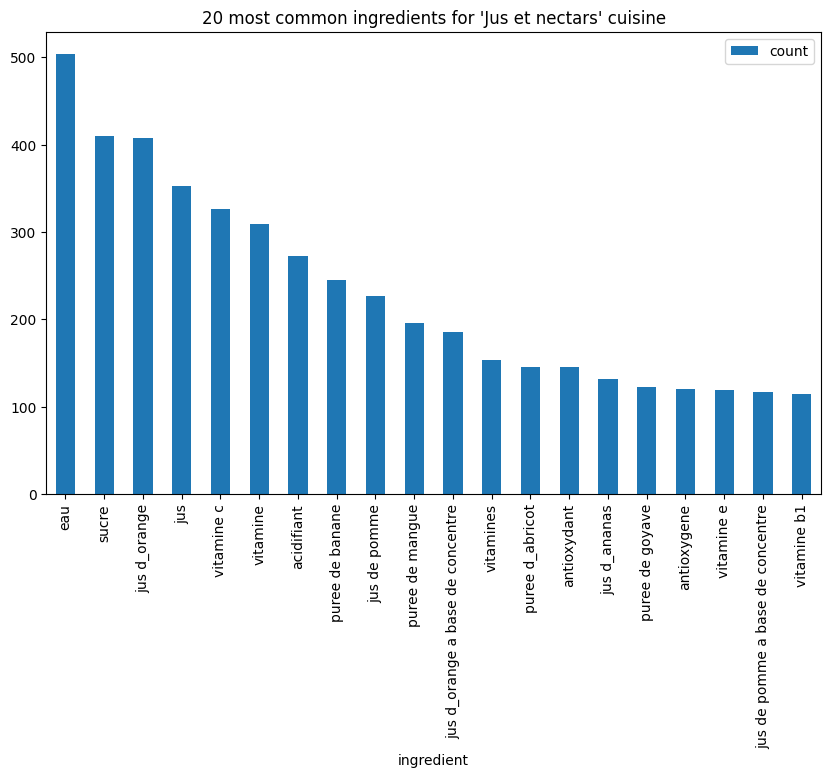

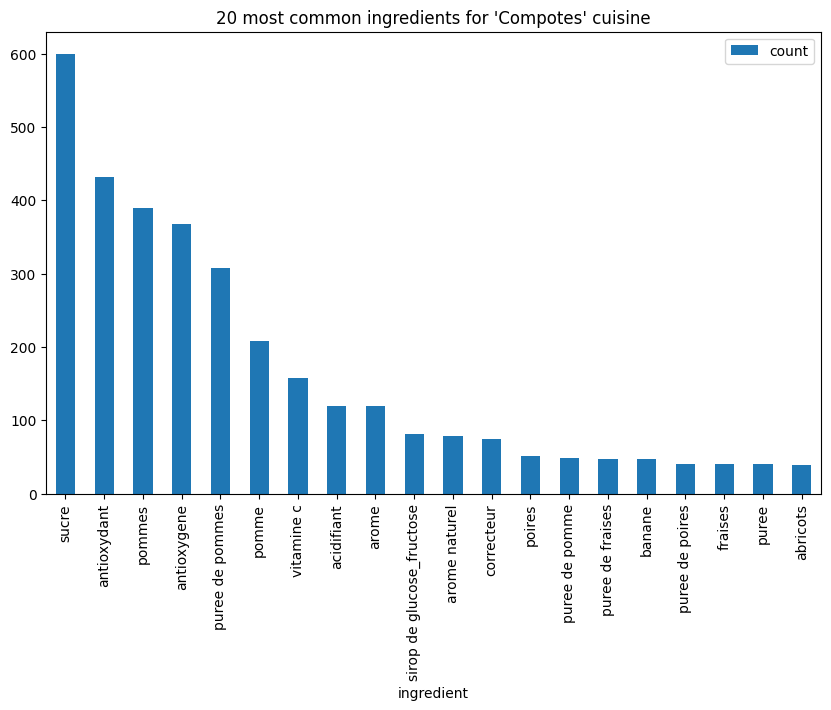

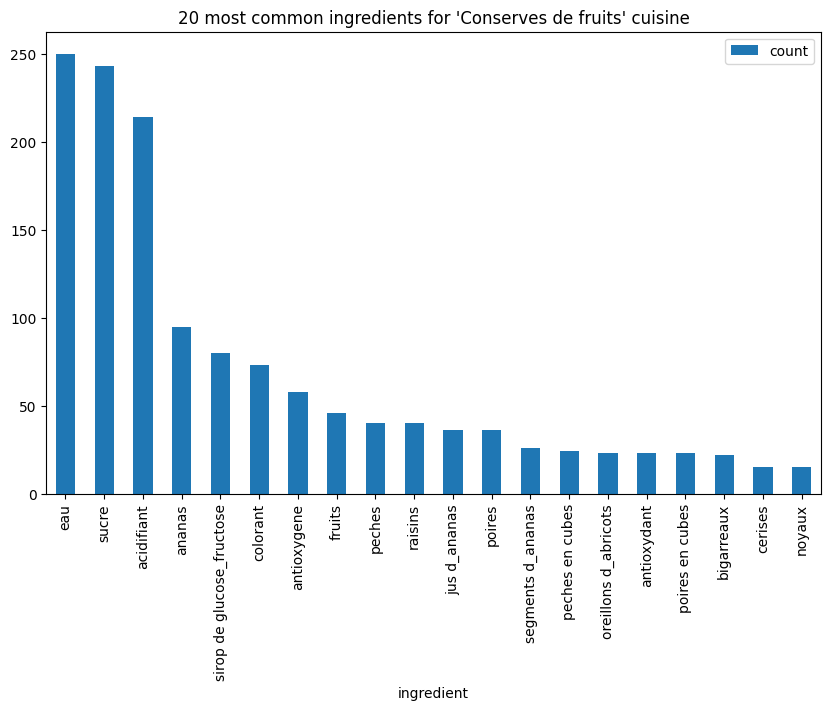

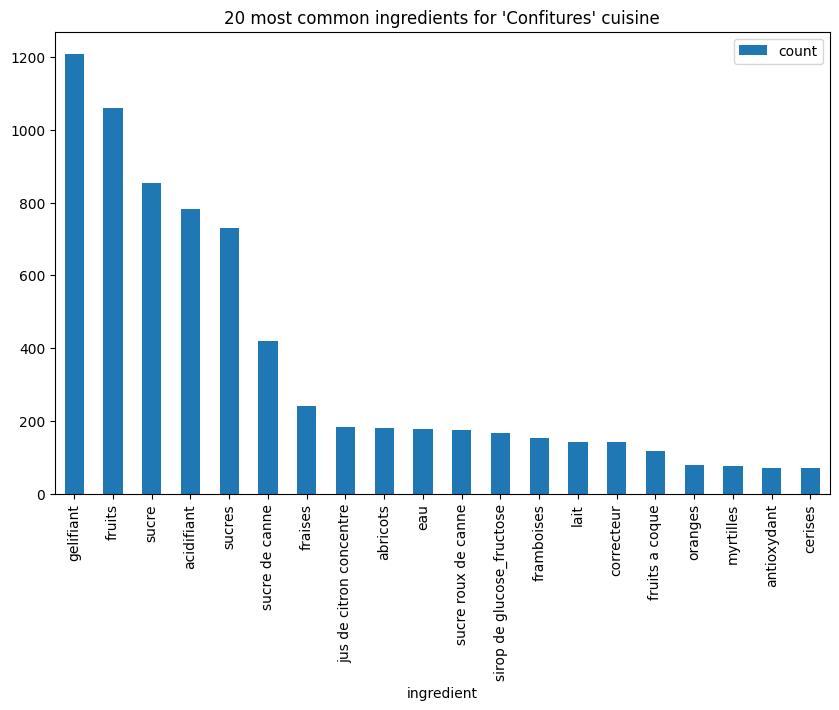

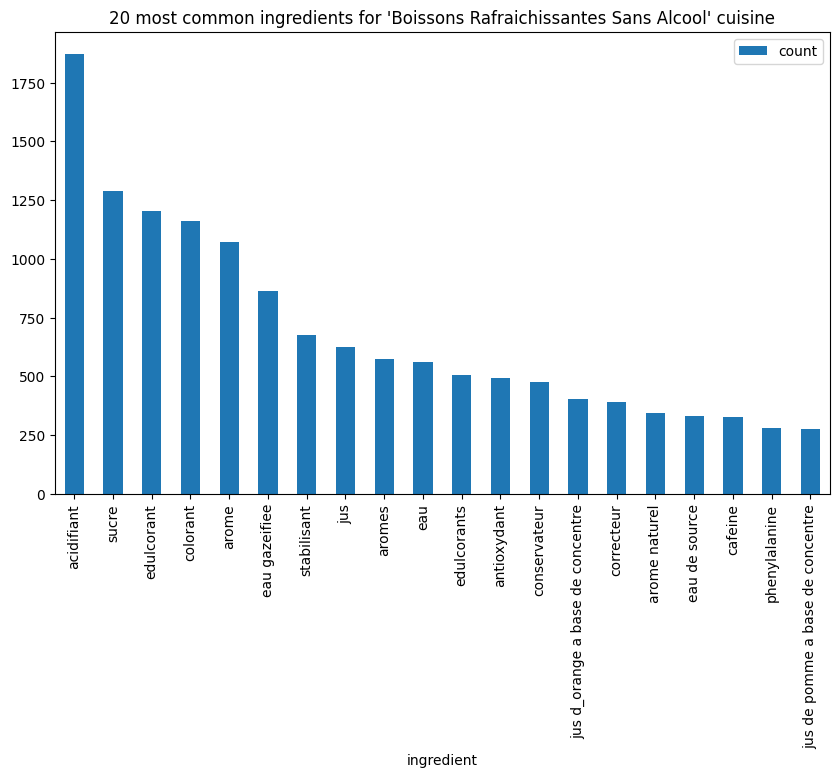

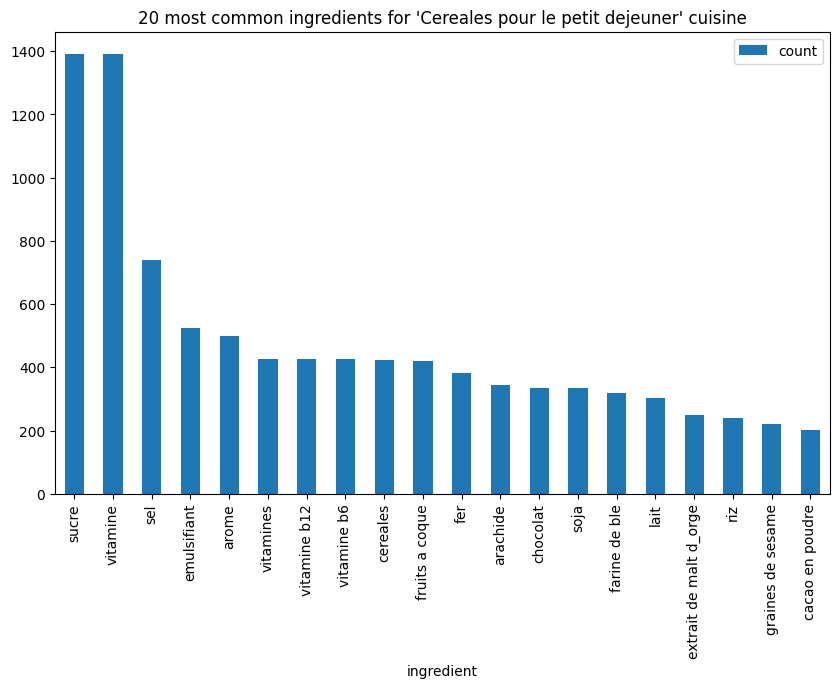

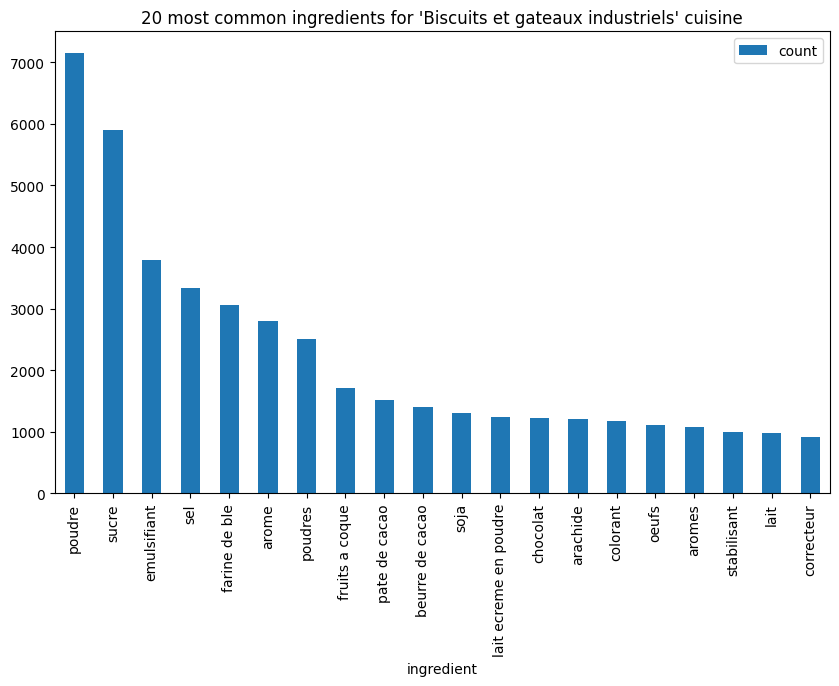

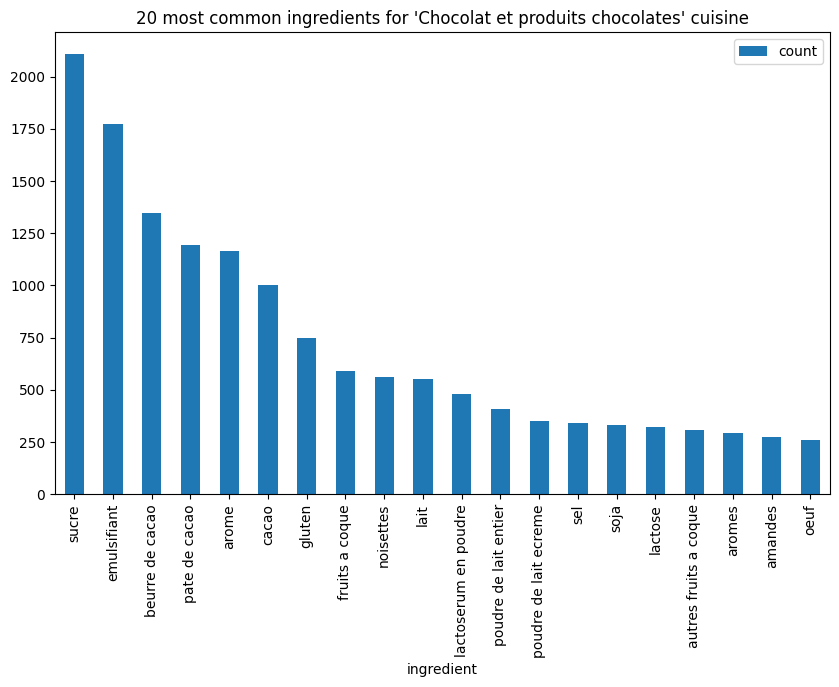

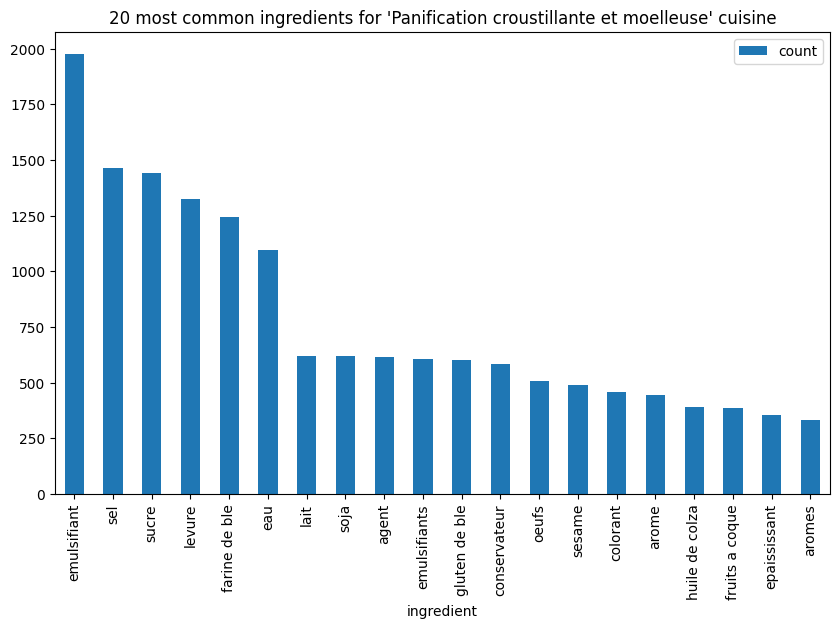

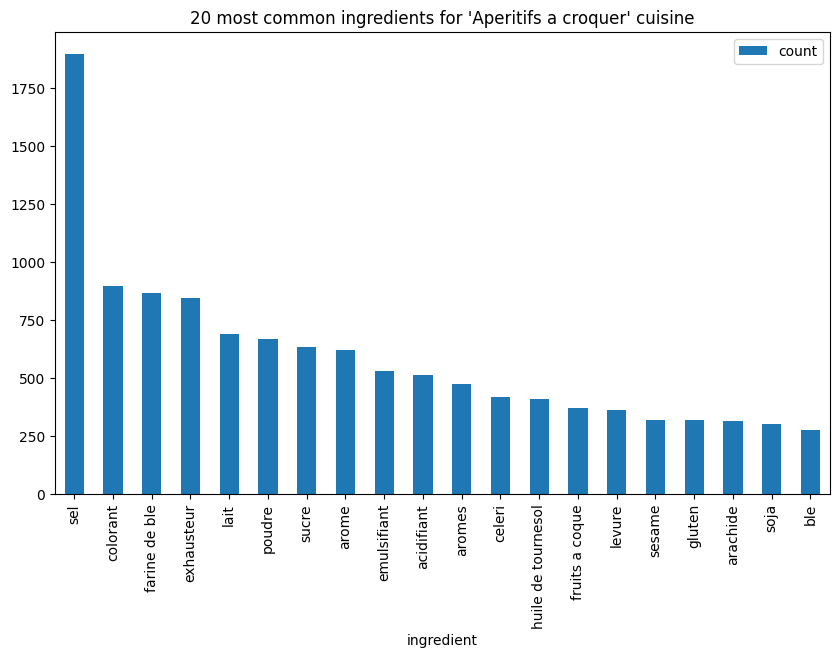

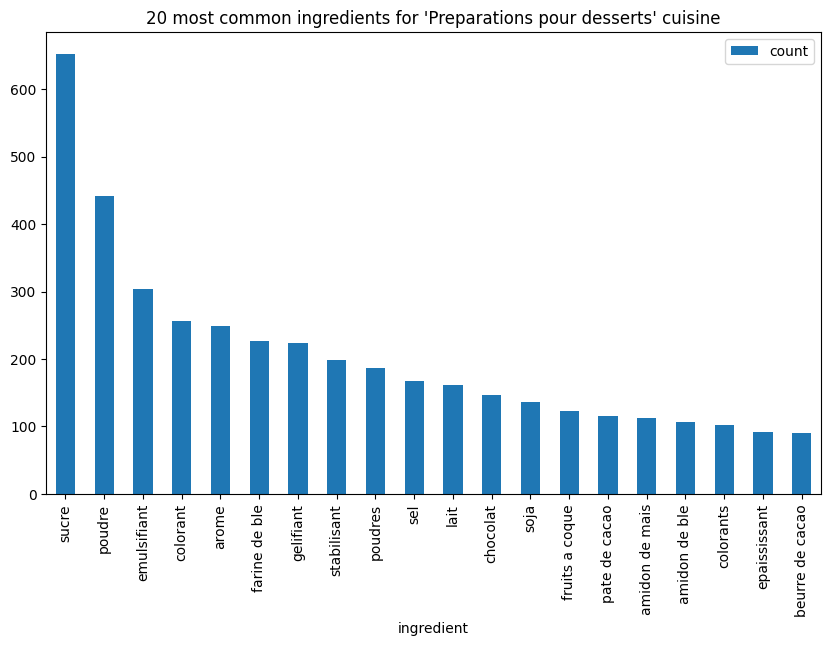

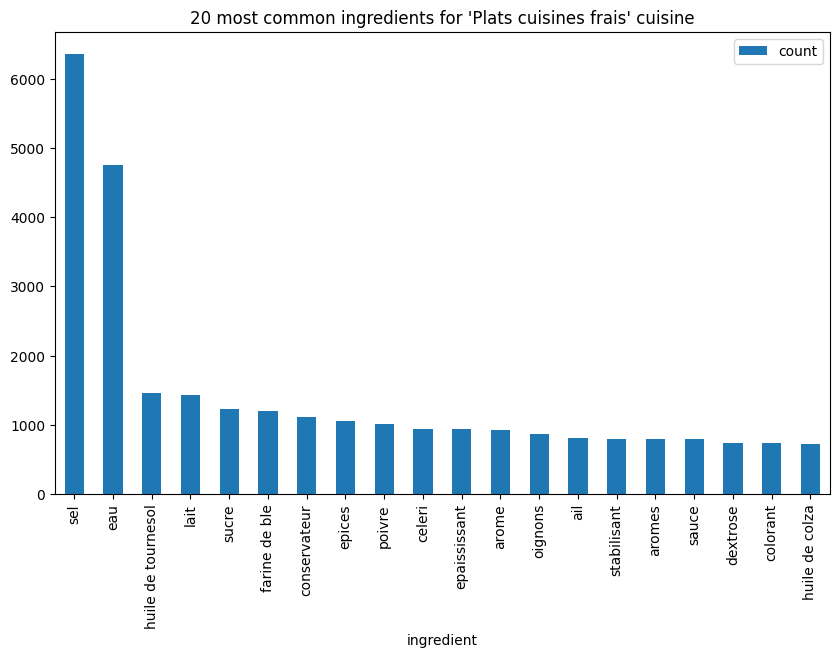

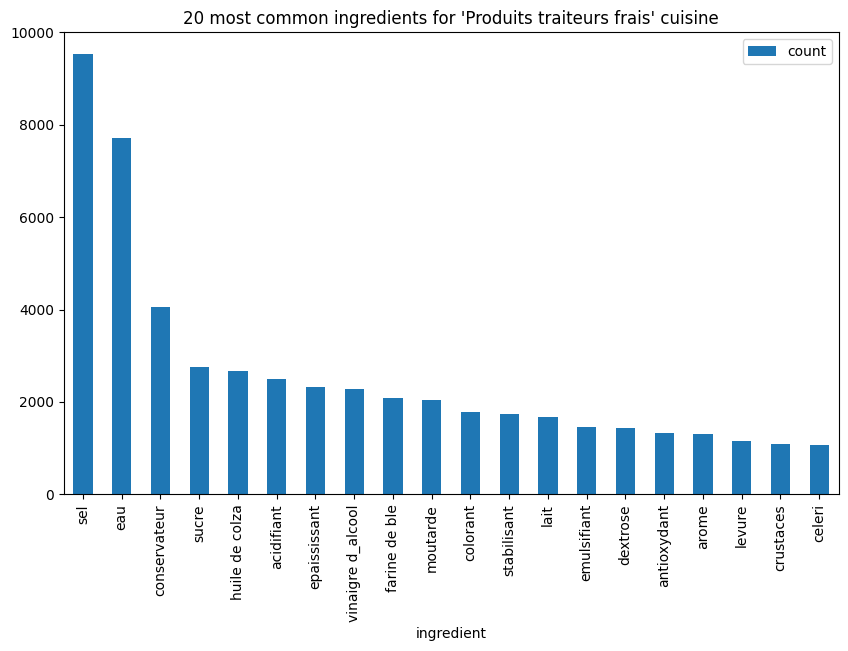

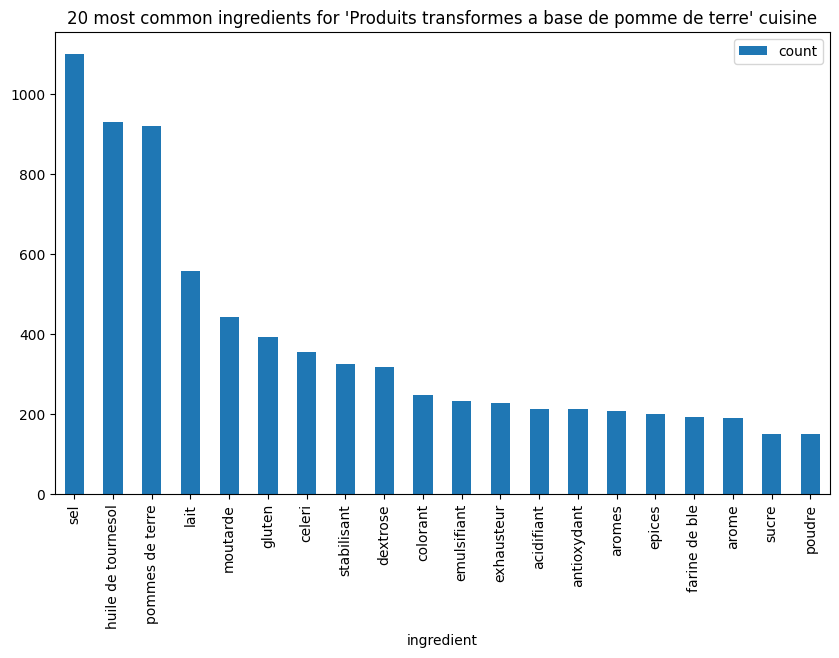

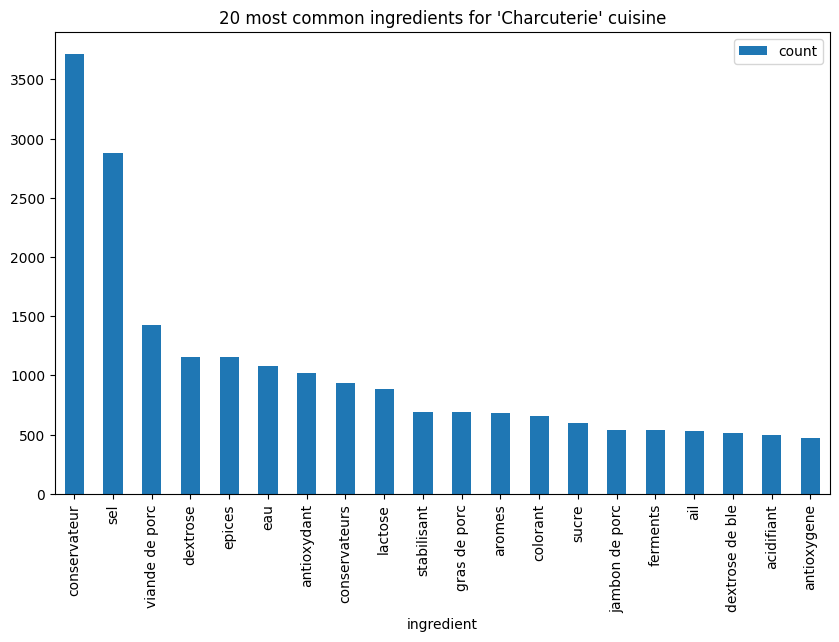

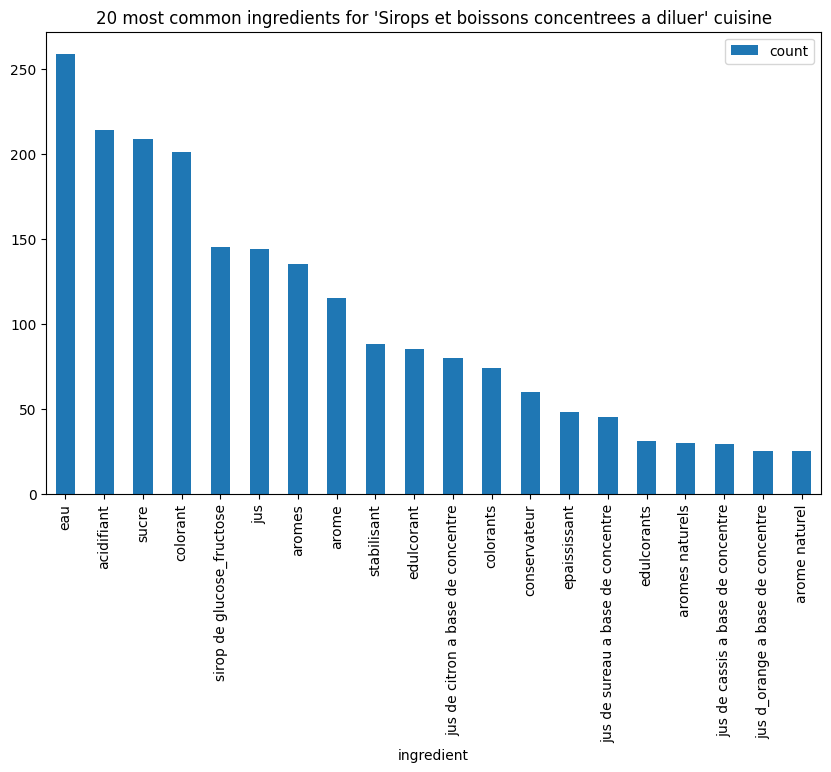

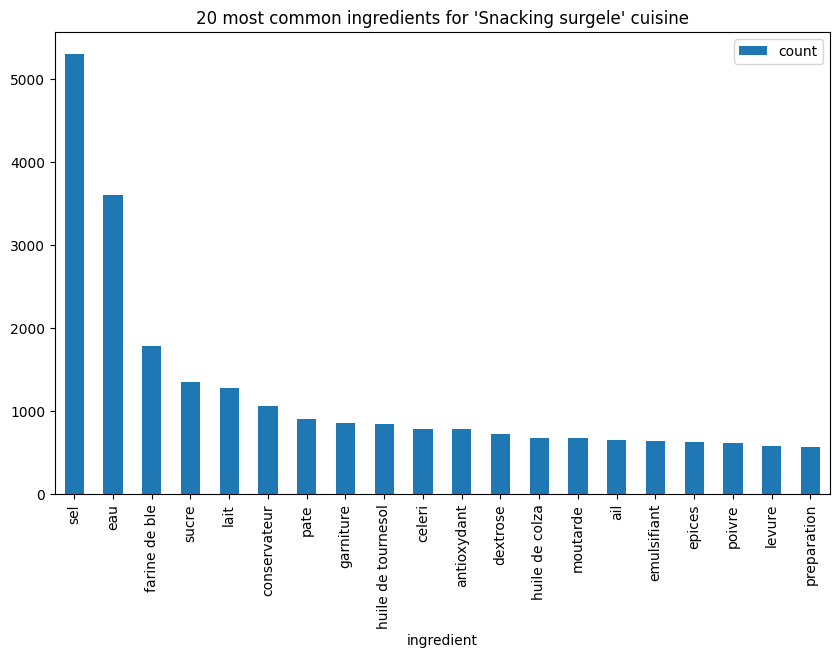

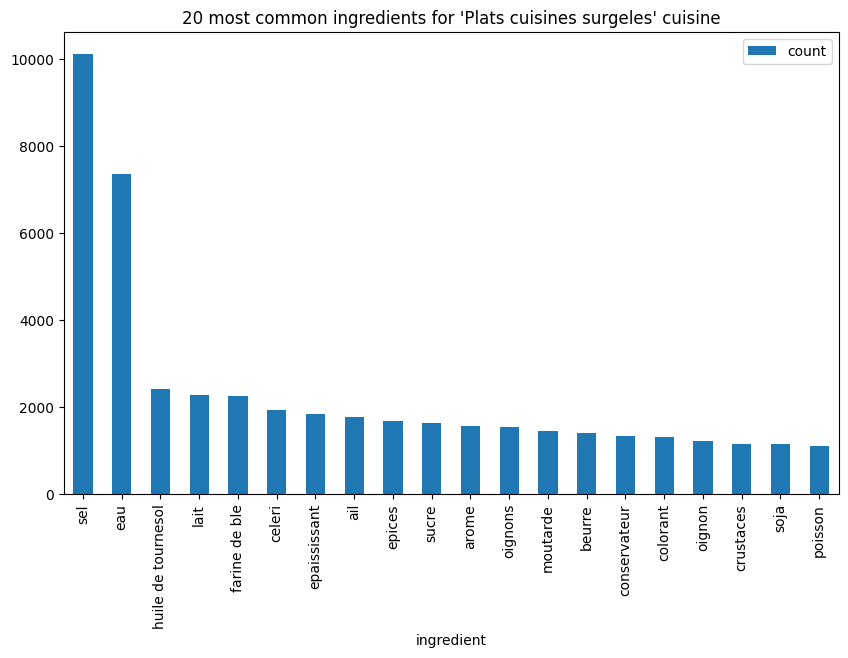

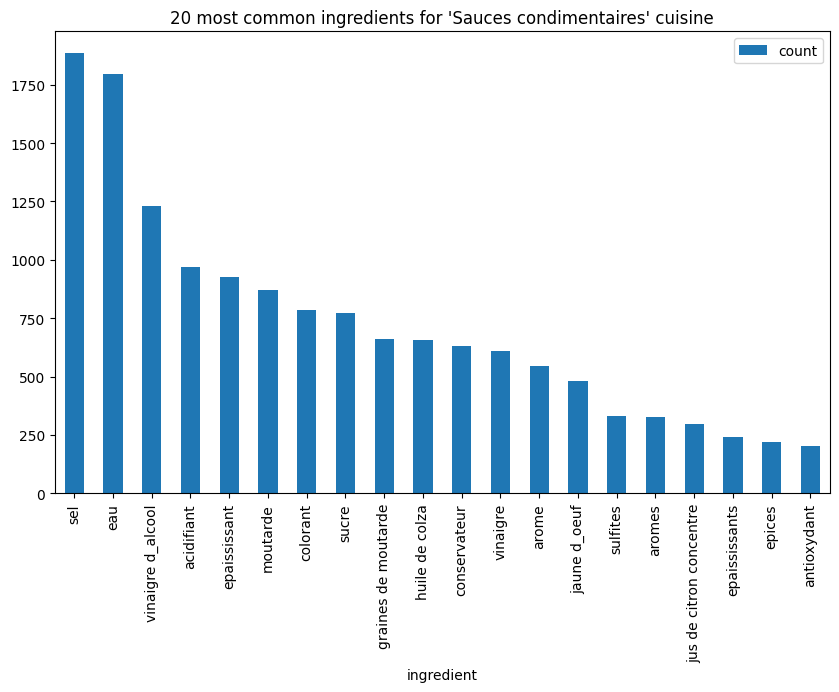

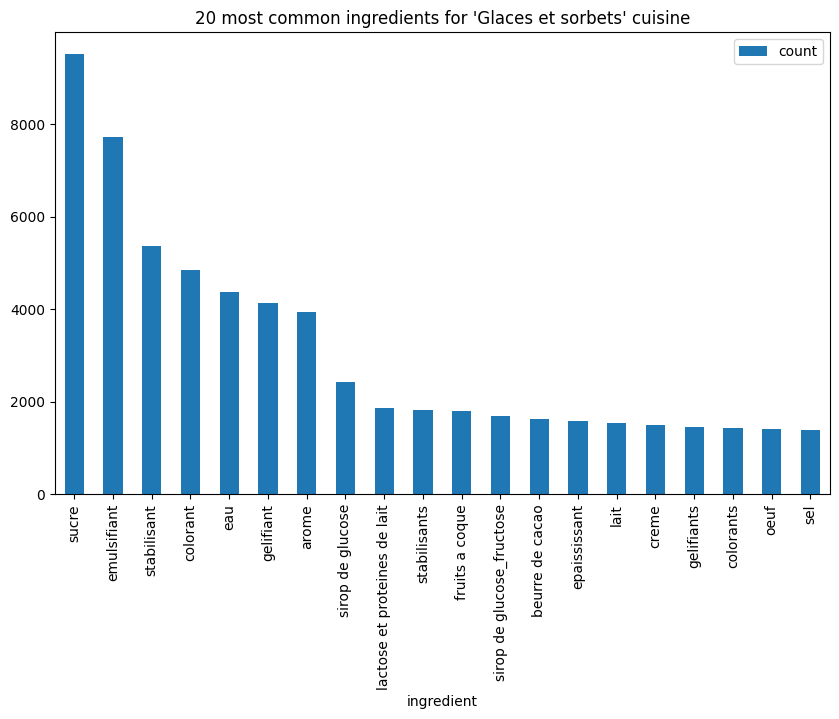

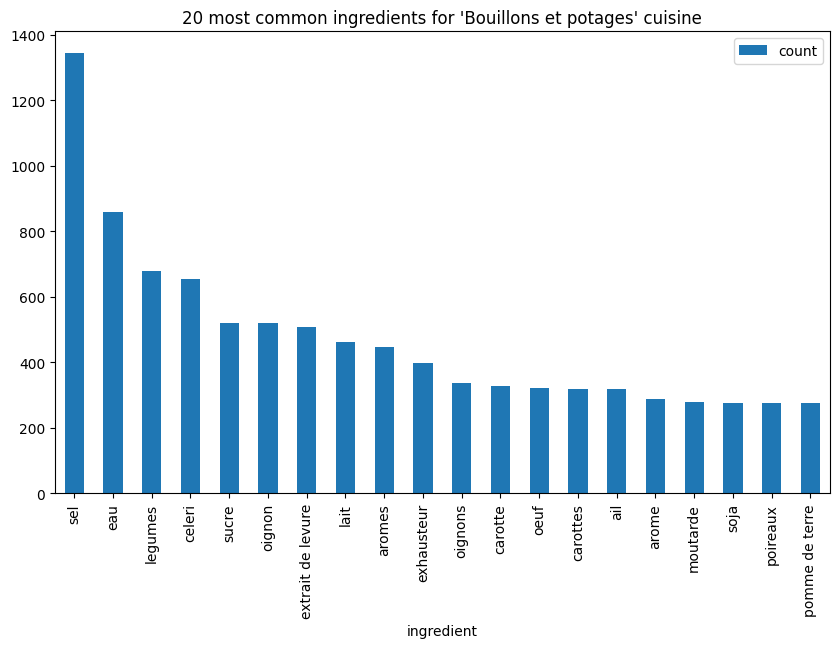

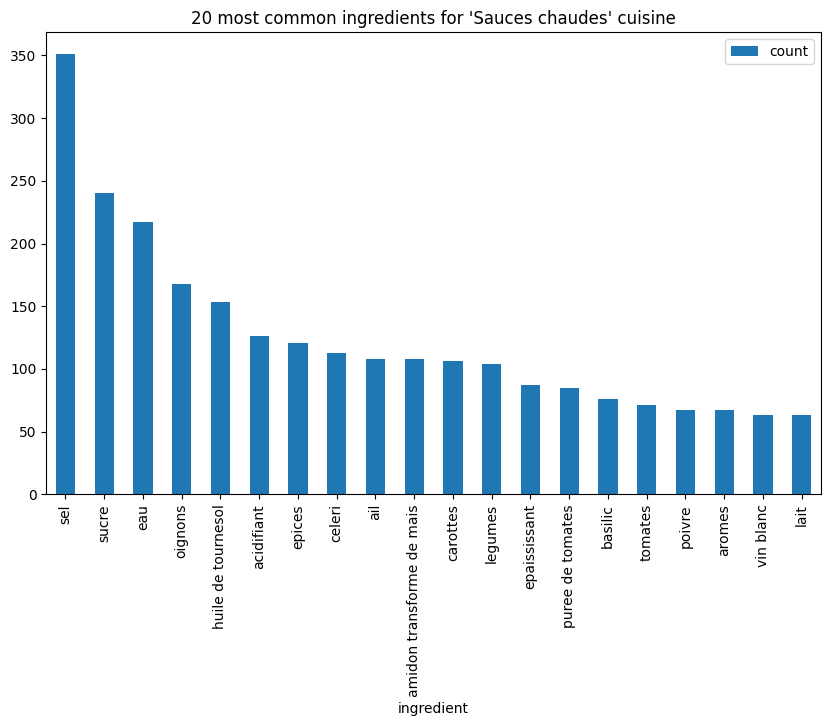

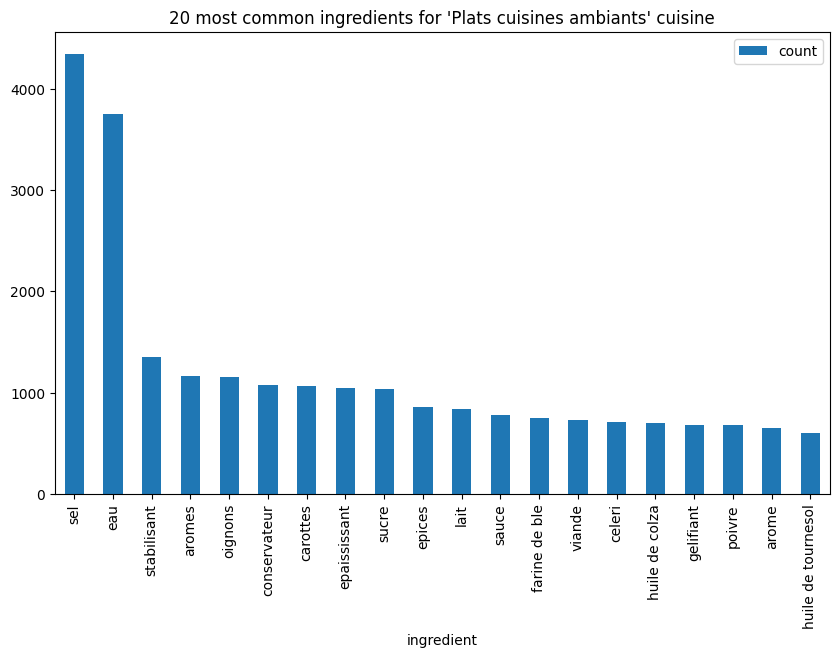

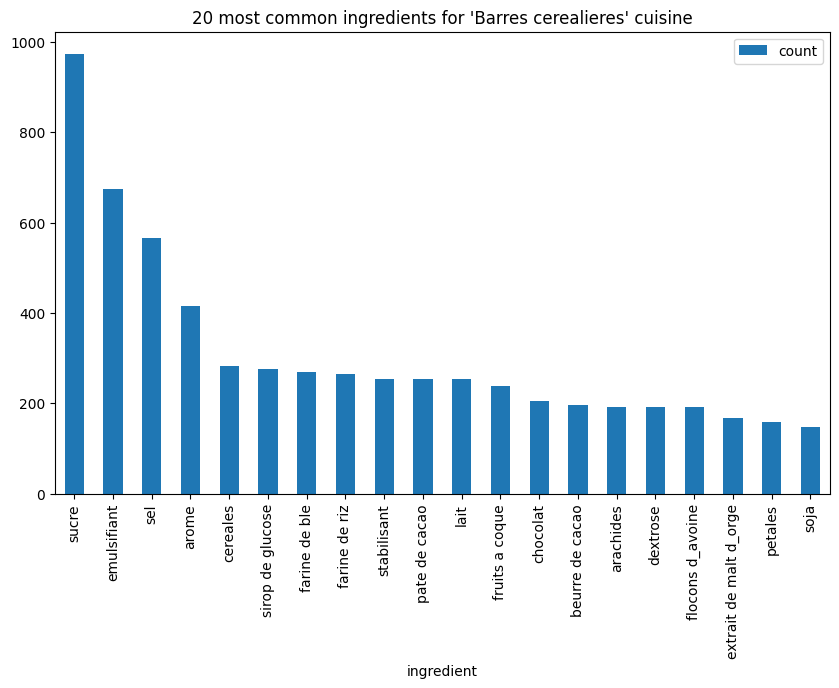

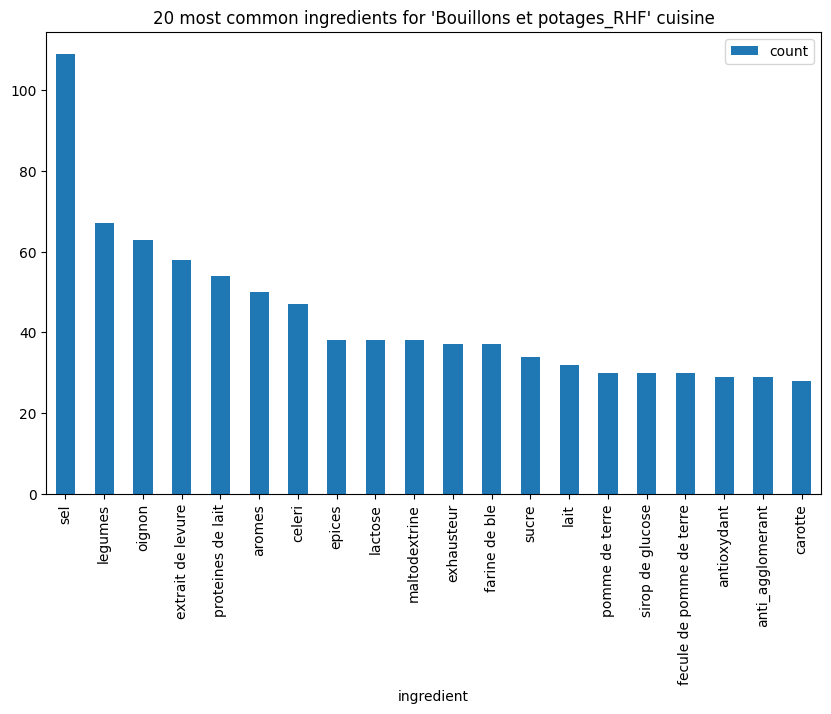

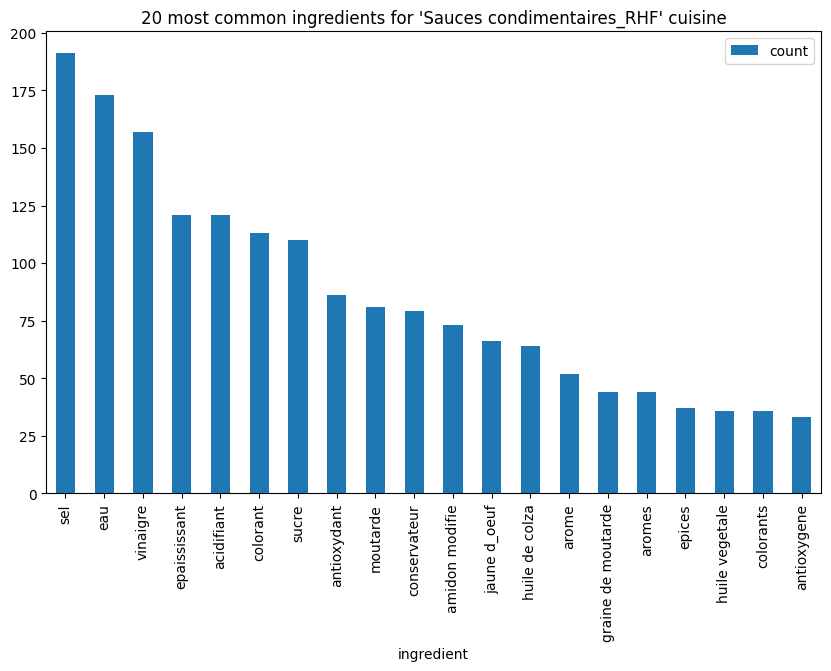

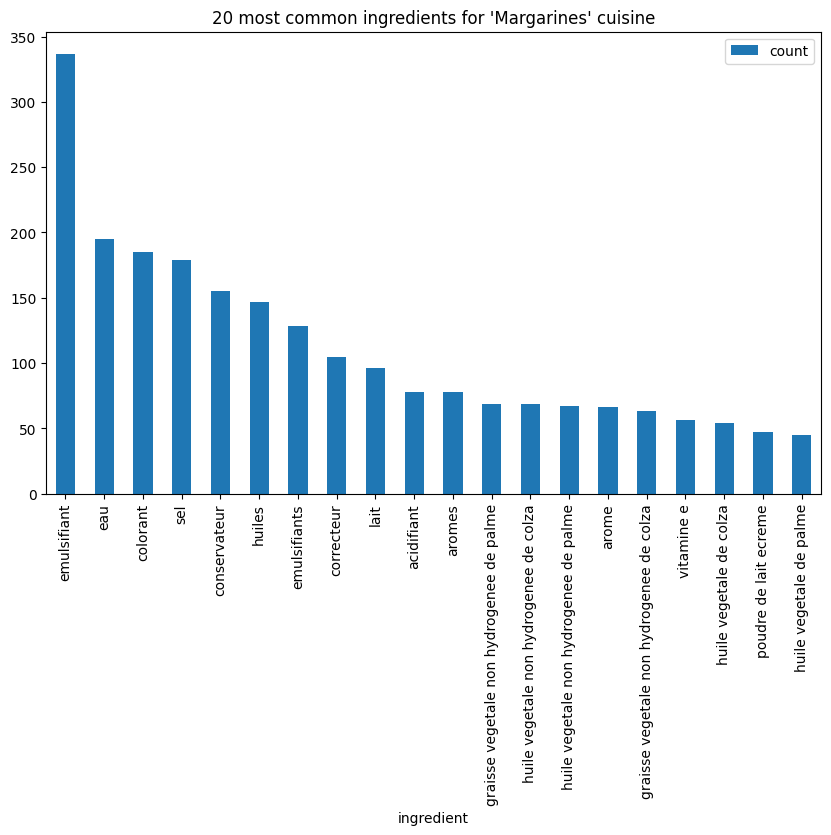

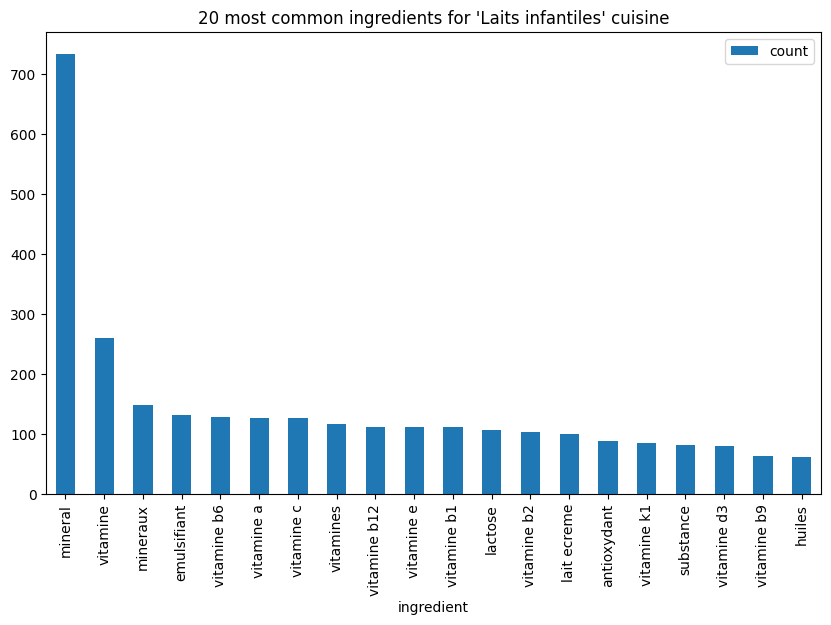

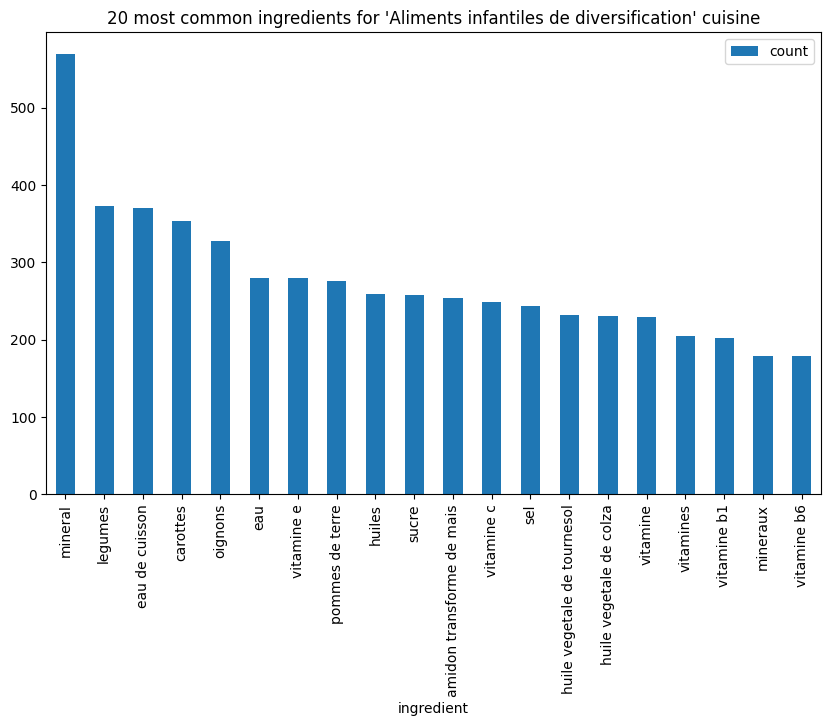

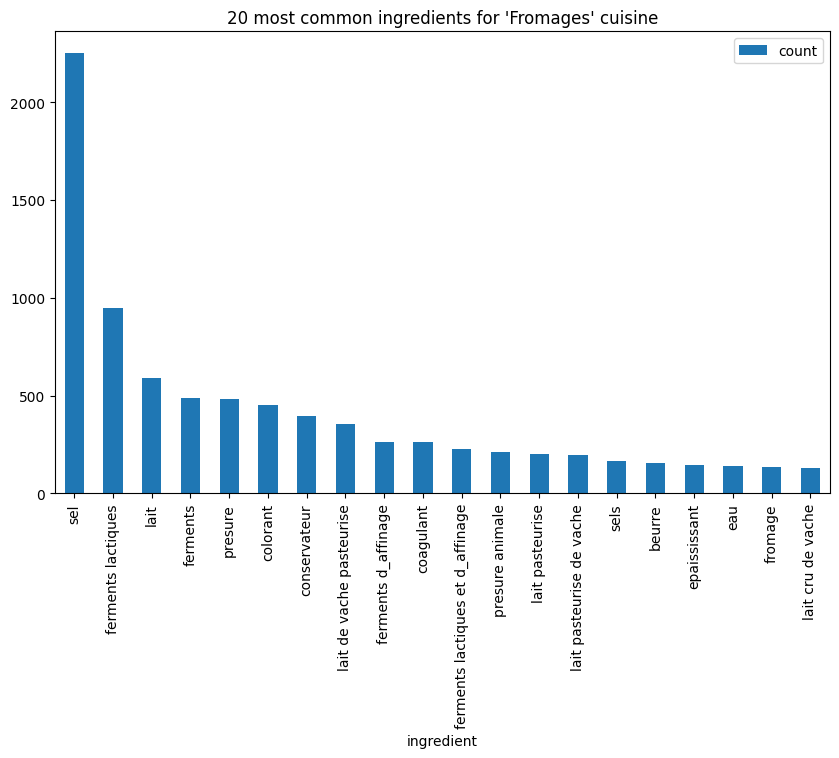

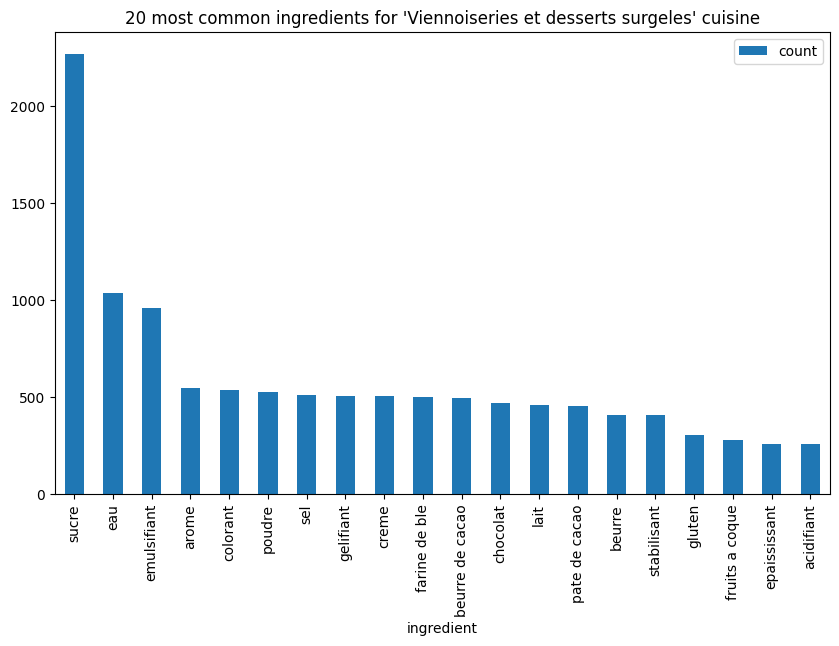

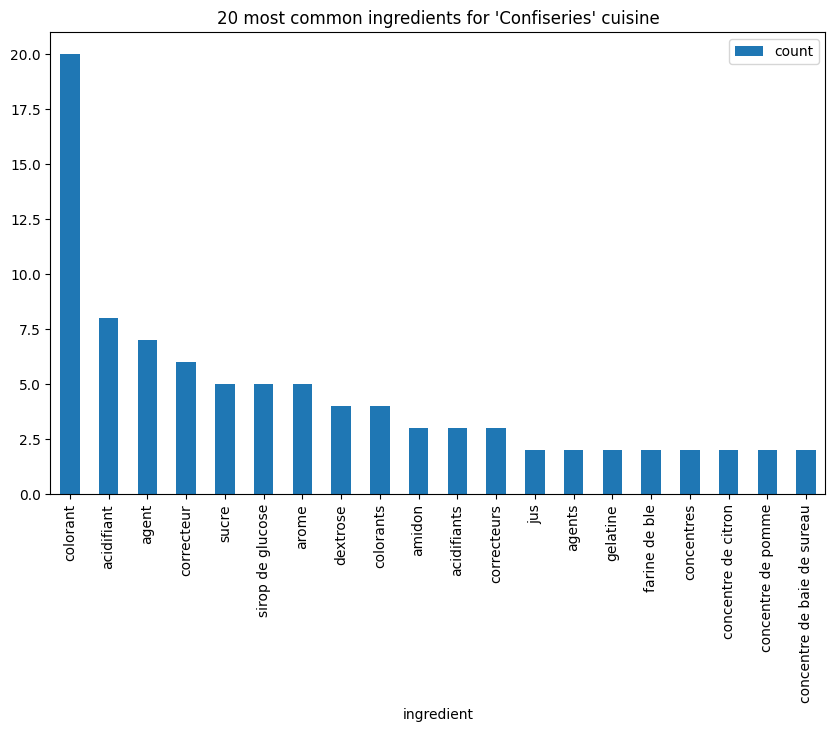

In [17]:
import matplotlib.pyplot as plt

# bar char plot of top 20 most common ingredients
for key, value in cuisine_dict.items():
    mc = pd.DataFrame(value.most_common(20), columns=["ingredient", "count"])
    mc.plot(kind="bar", x="ingredient", figsize=(10,6), title="20 Most Common Ingredients")   
    plt.title("20 most common ingredients for '%s' cuisine" % key)
    plt.show()

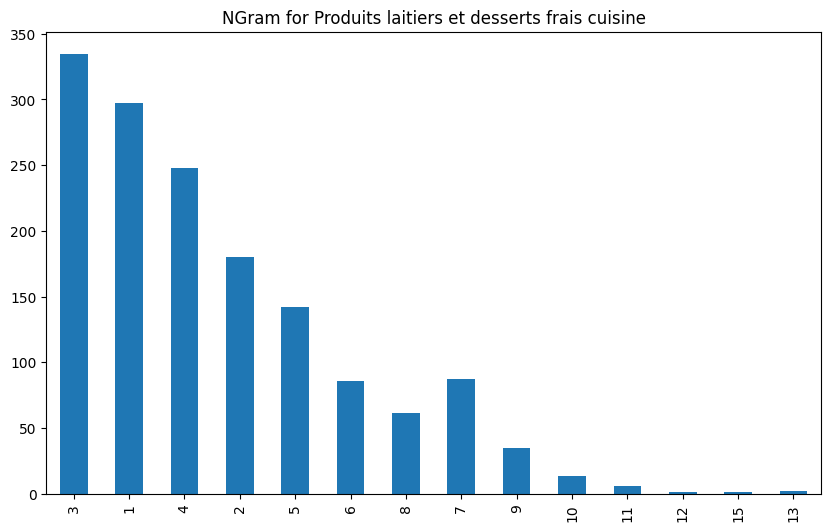

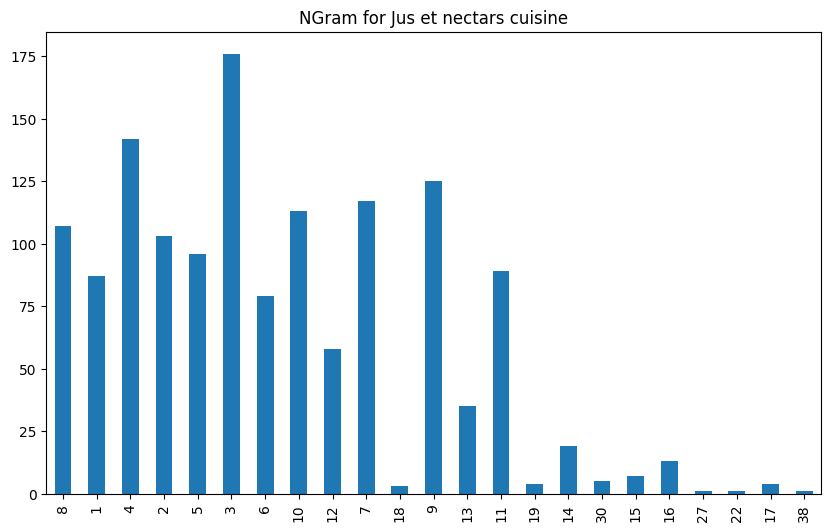

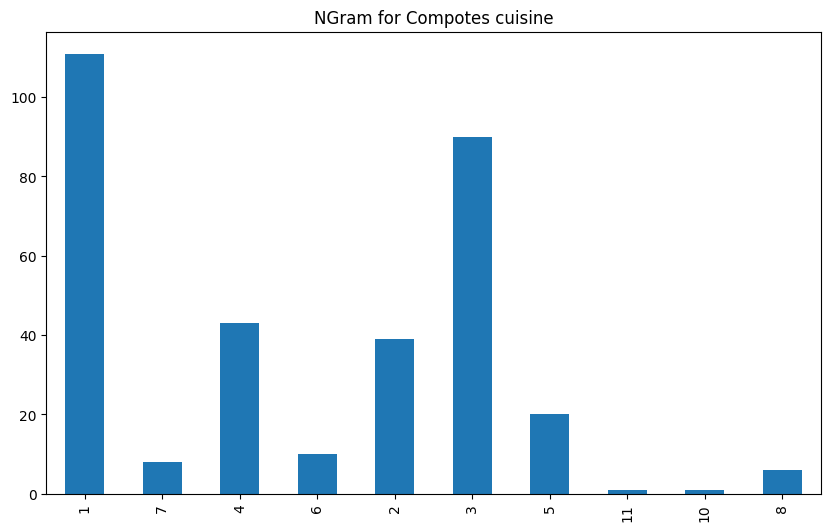

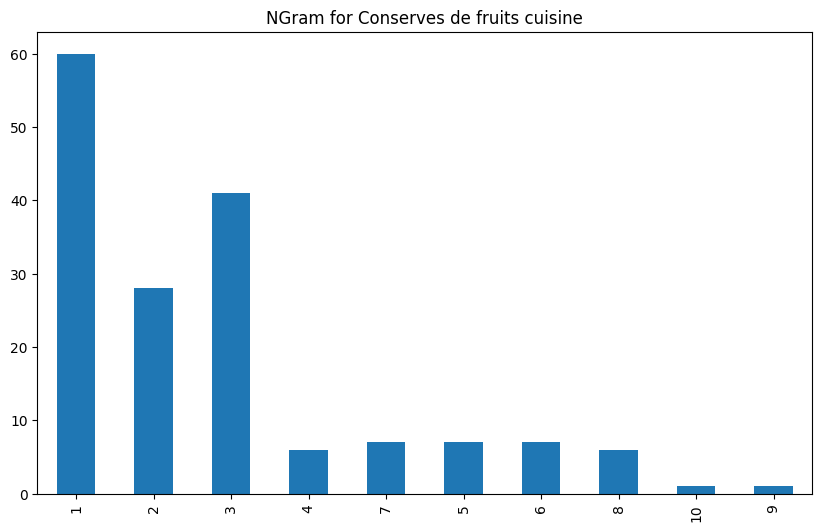

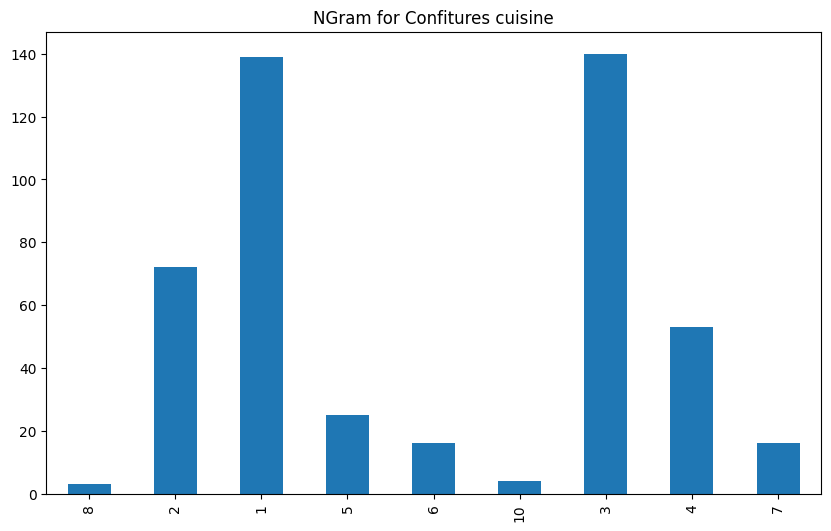

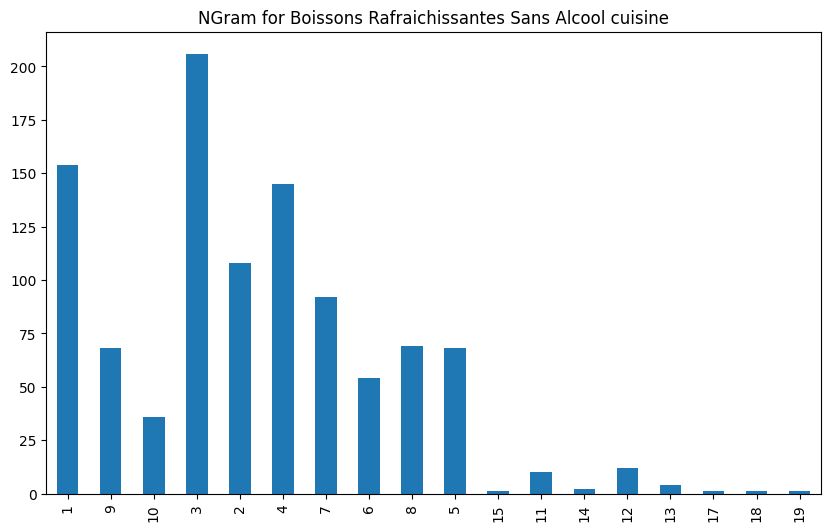

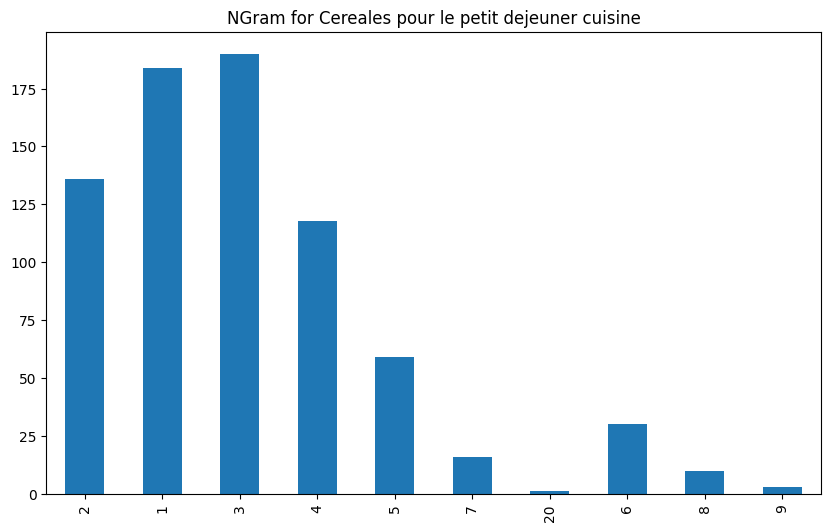

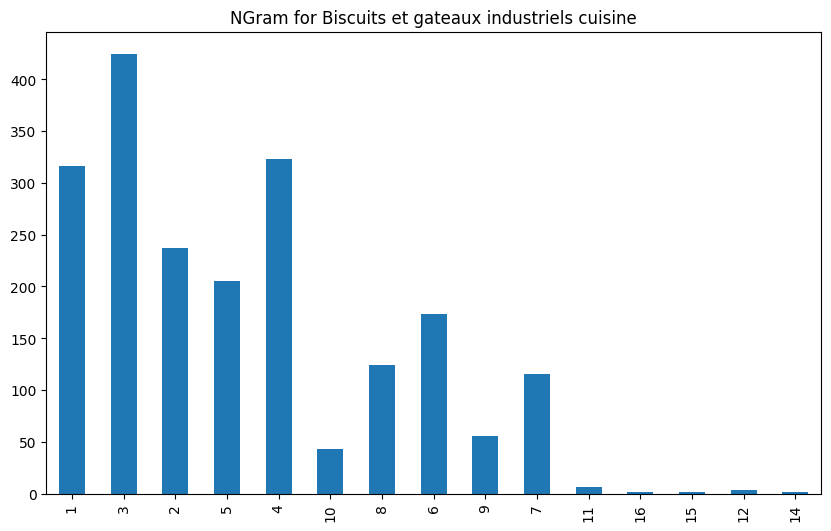

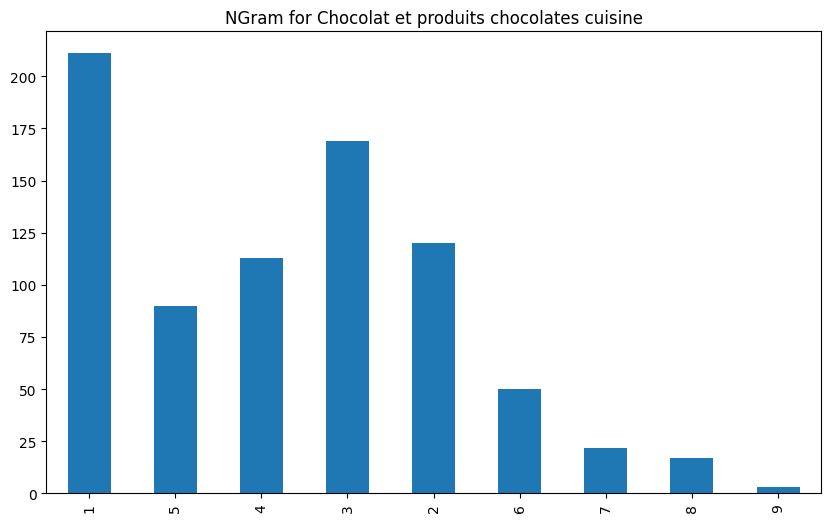

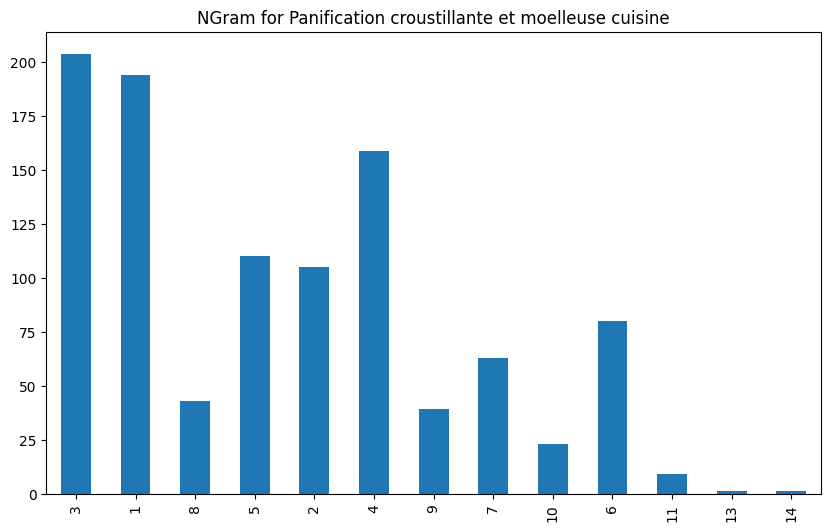

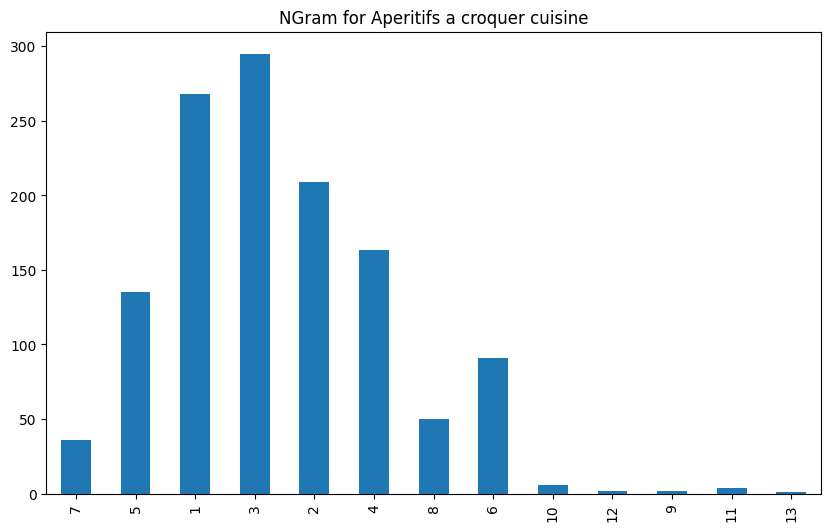

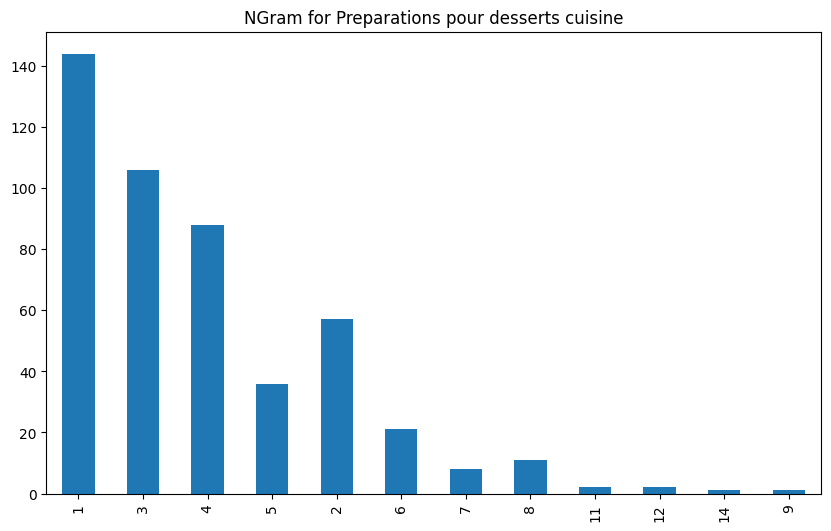

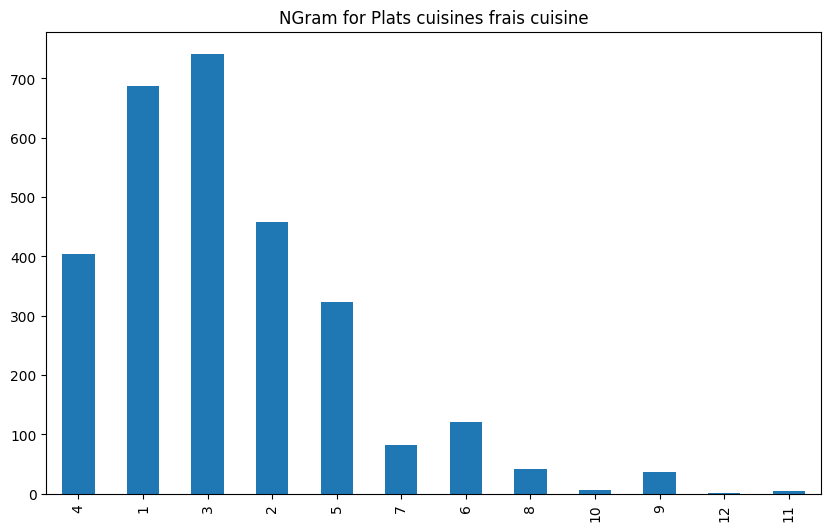

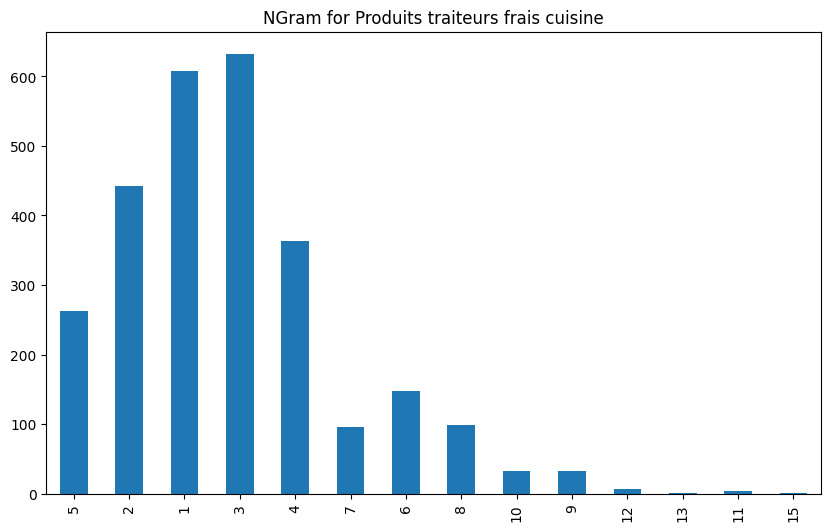

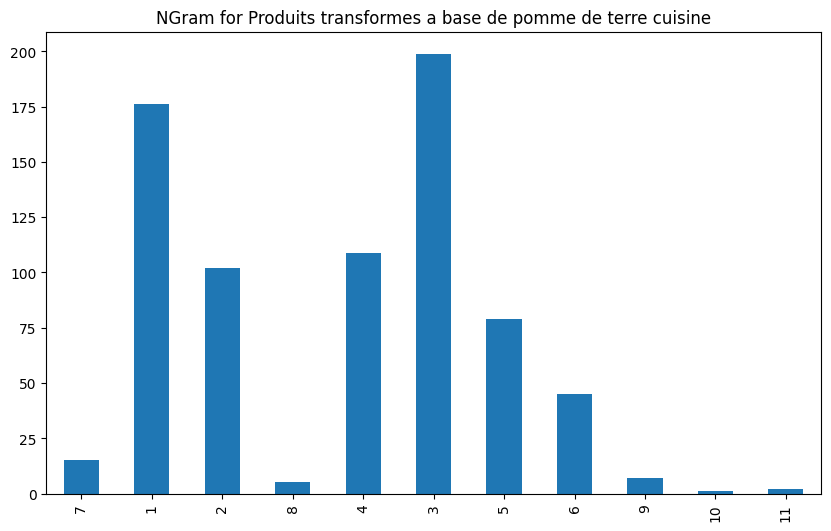

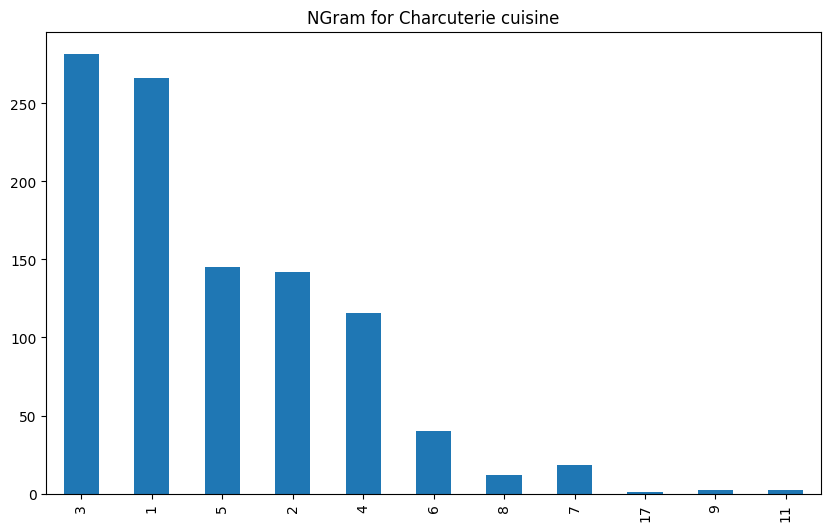

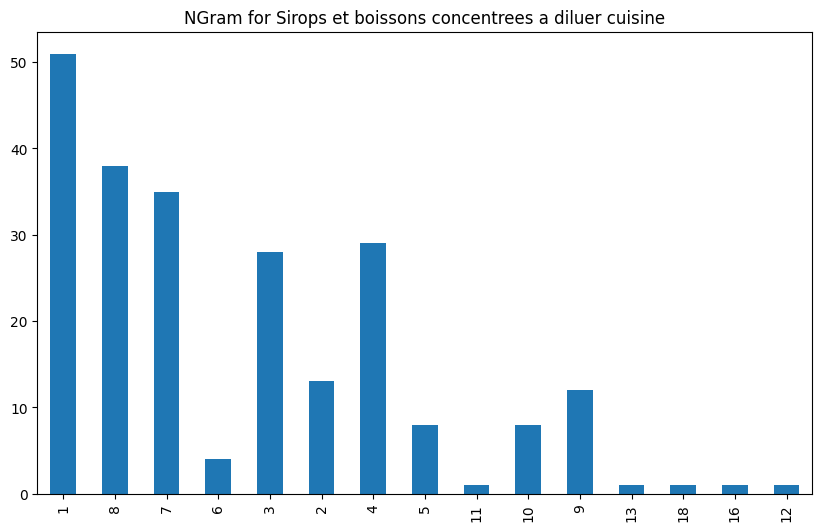

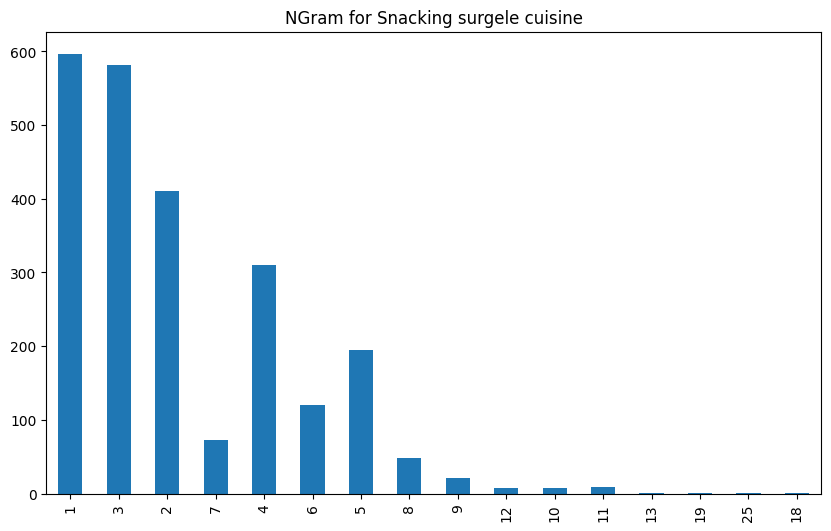

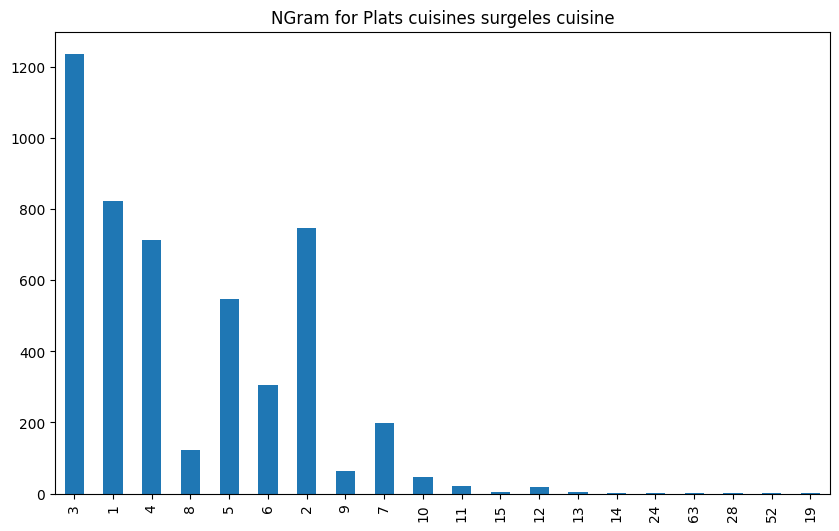

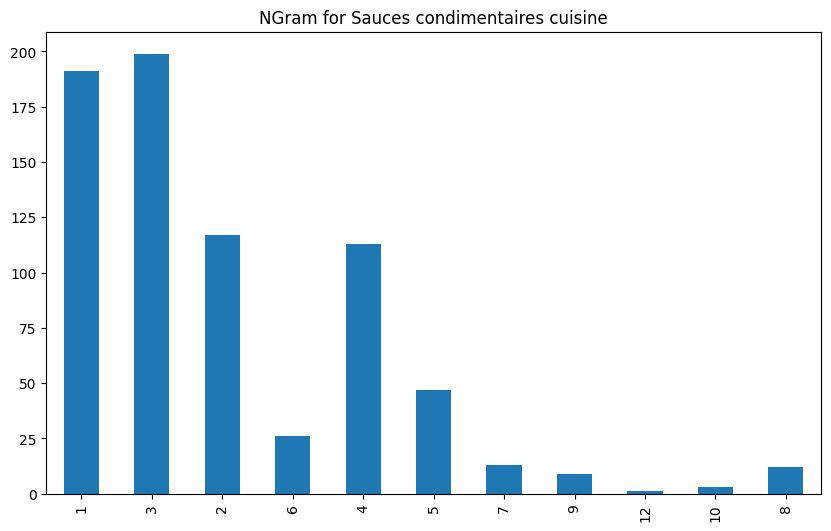

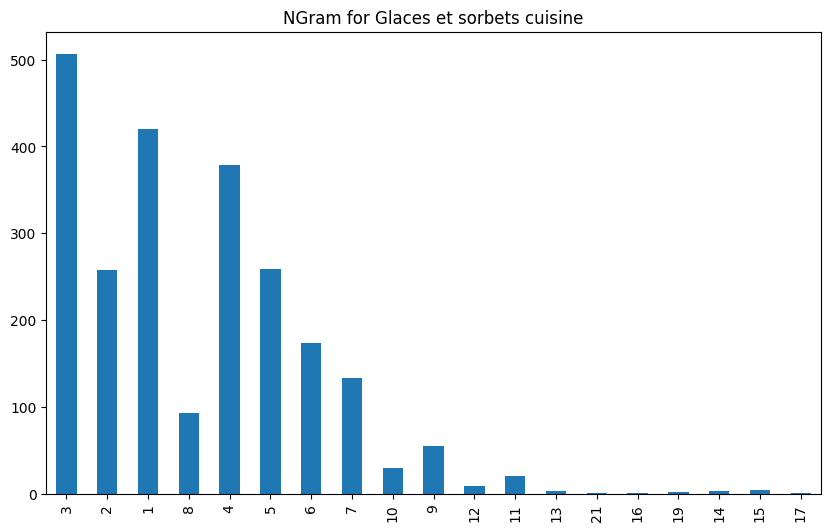

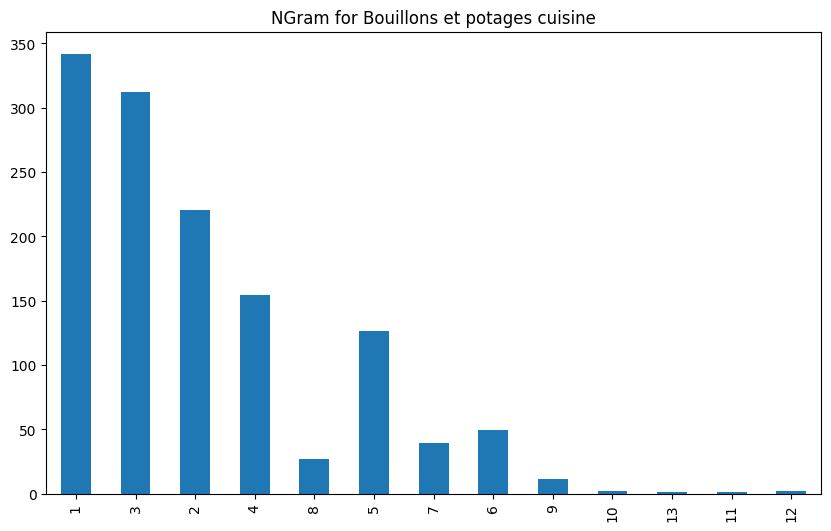

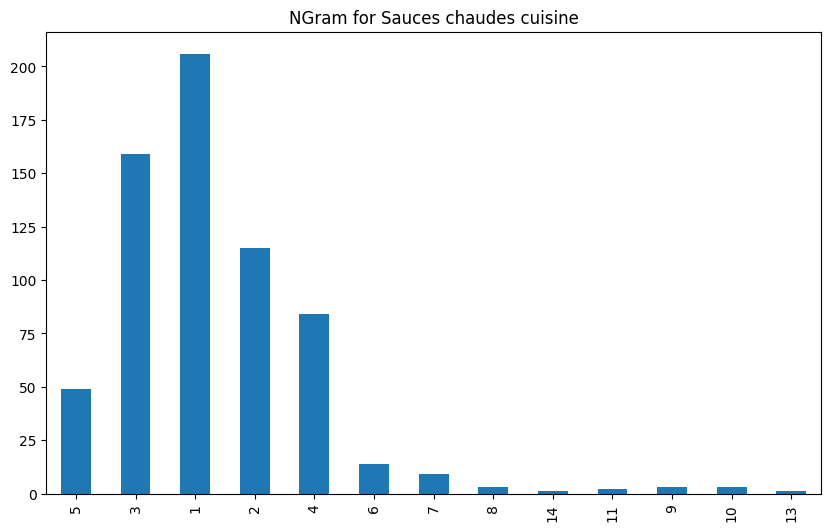

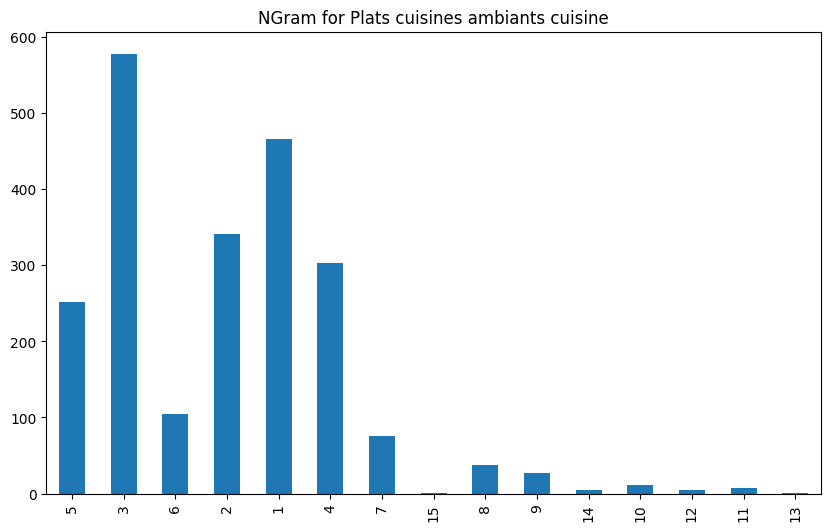

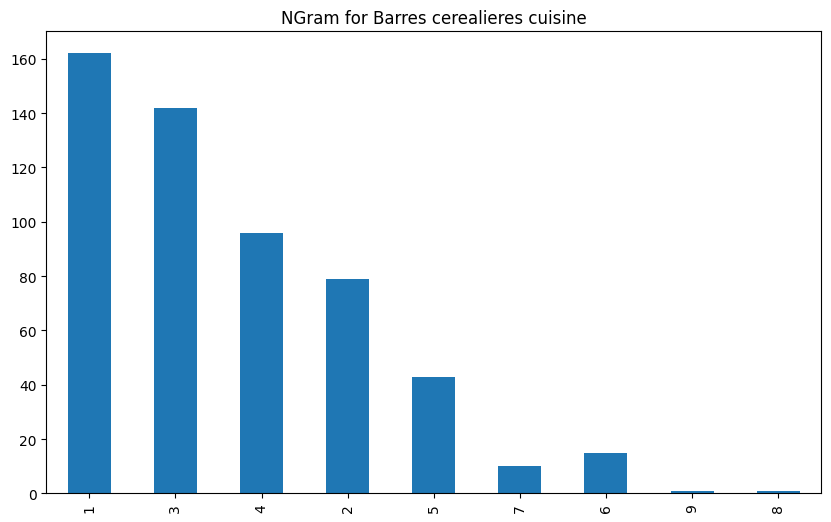

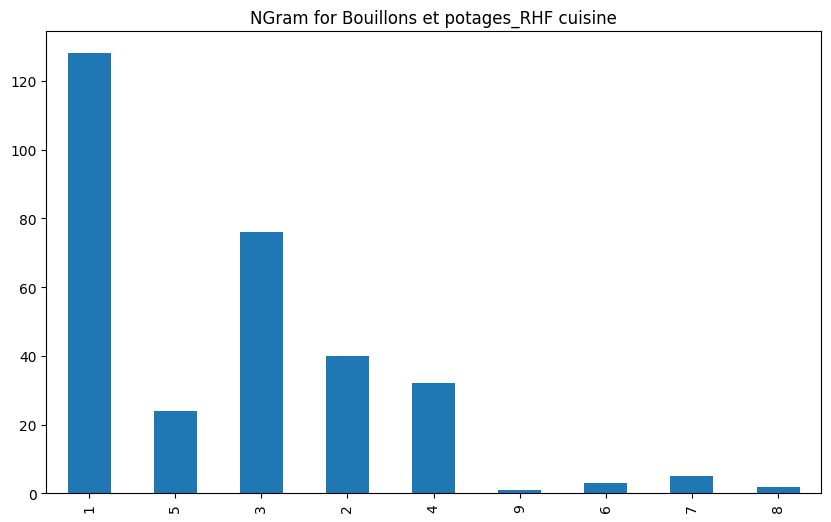

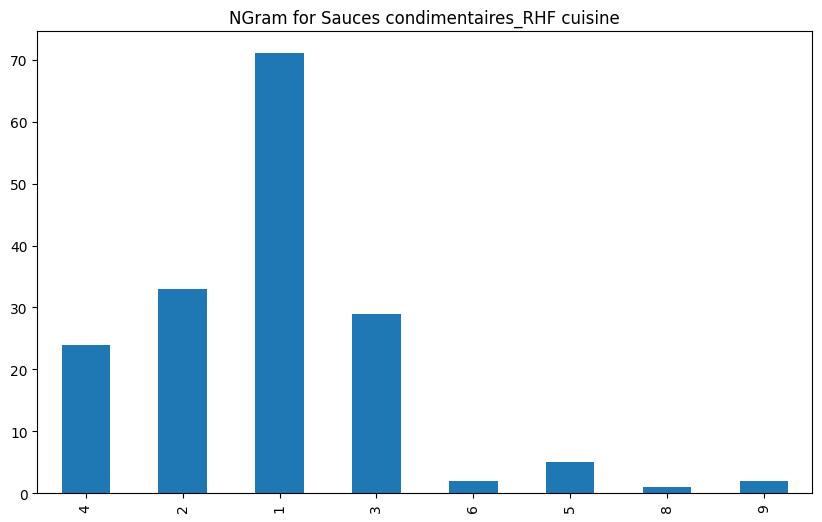

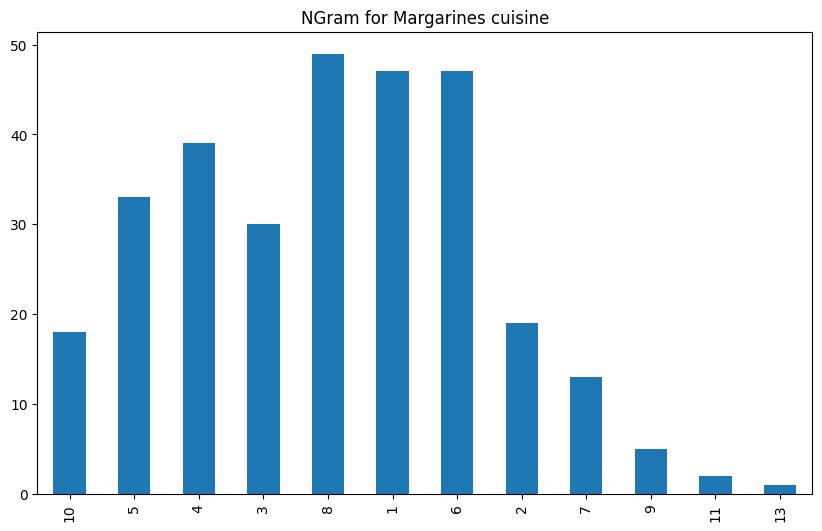

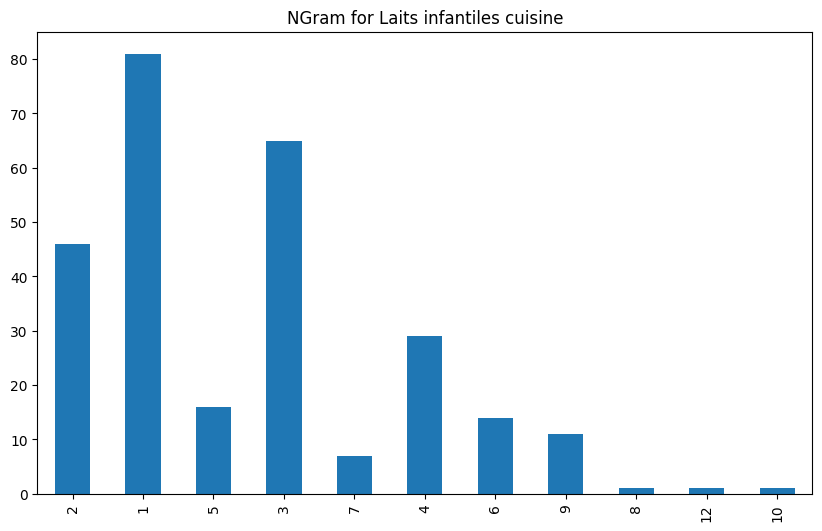

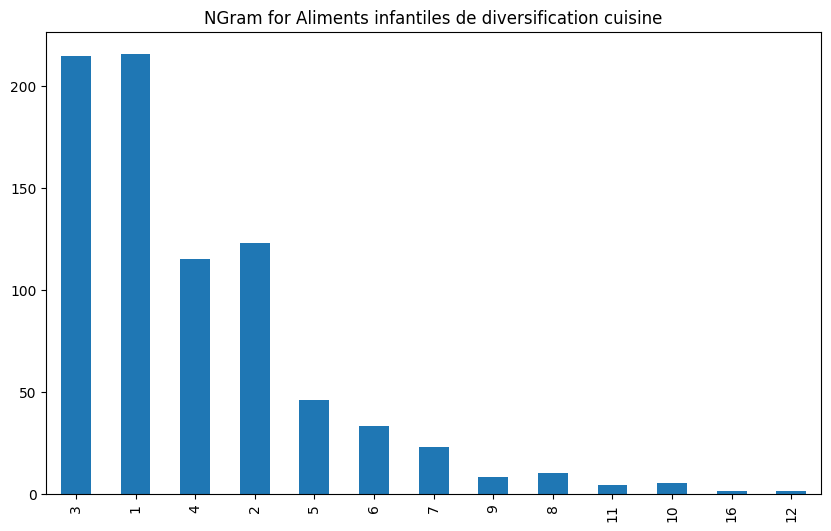

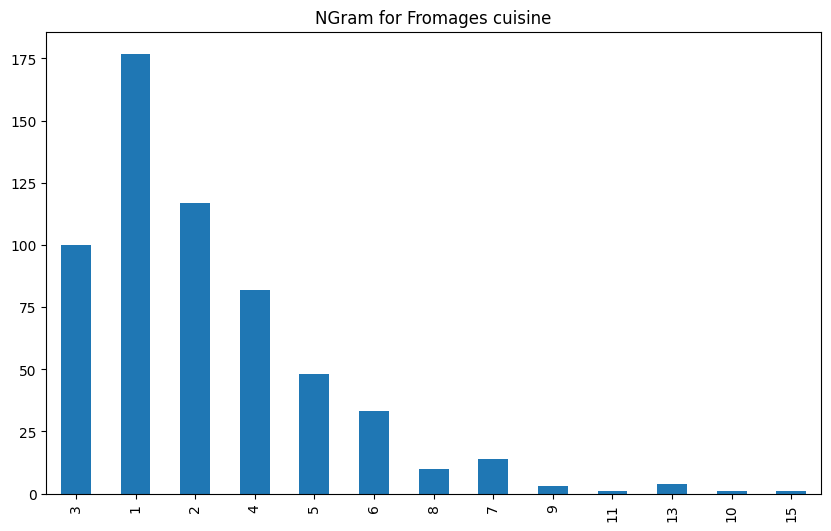

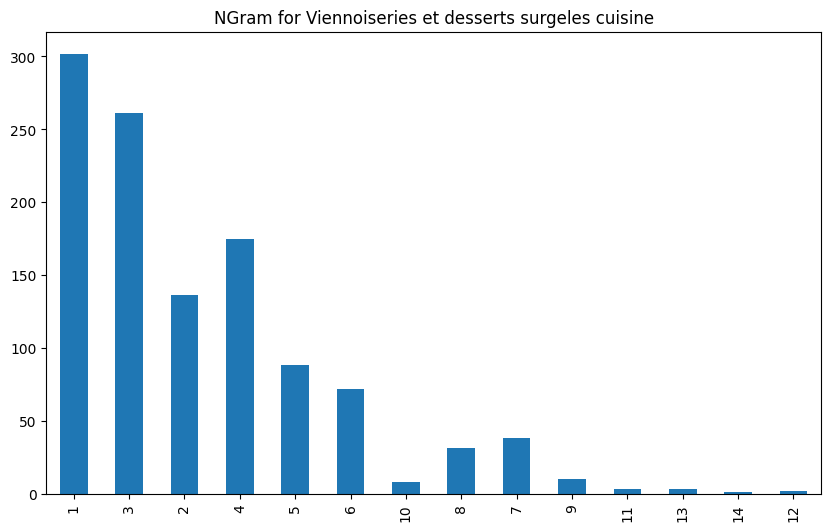

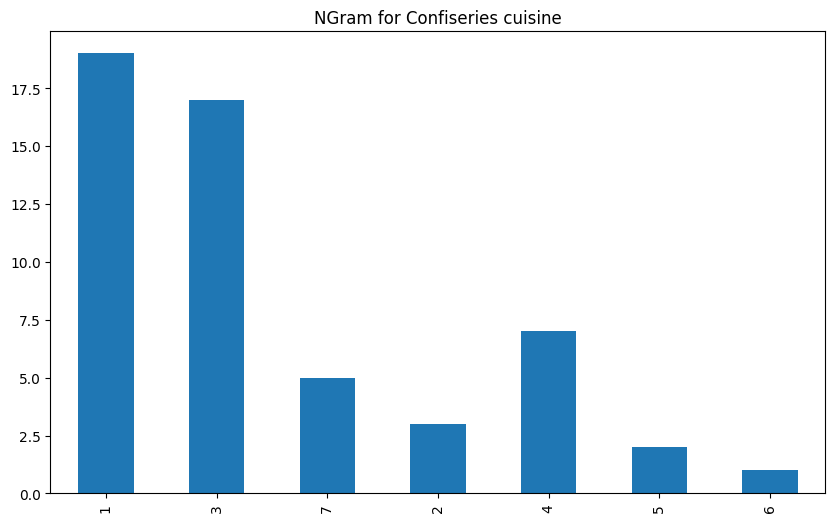

In [18]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

# ngram range for each cuisine
stemmer = PorterStemmer()
ngram_counters = {}
for key, value in cuisine_dict.items():
    rng = [len(word_tokenize(stemmer.stem(wc))) for wc, val in value.items()]  
    local_ngram_counter = Counter(rng)
    ngram_counters[key] = local_ngram_counter
    local_series = pd.Series(local_ngram_counter)
    local_series.plot(kind="bar", figsize=(10,6), title="NGram for %s cuisine" % key)  
    plt.show()

In [19]:
# vector of ngram for each cuisine
ngram_index = {}
for key, value in ngram_counters.items():
    ngram_index[key] = dict(value)
df_ngram = pd.DataFrame.from_dict(ngram_index, orient='index')
df_ngram = df_ngram.fillna(0)
df_ngram[0:30]

,3,1,4,2,5,6,8,7,9,10,...,22,17,38,20,25,24,63,28,52,21
Produits laitiers et desserts frais,335,297,248,180,142,86,61.0,87.0,35.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jus et nectars,176,87,142,103,96,79,107.0,117.0,125.0,113.0,...,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Compotes,90,111,43,39,20,10,6.0,8.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Conserves de fruits,41,60,6,28,7,7,6.0,7.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Confitures,140,139,53,72,25,16,3.0,16.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Boissons Rafraichissantes Sans Alcool,206,154,145,108,68,54,69.0,92.0,68.0,36.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cereales pour le petit dejeuner,190,184,118,136,59,30,10.0,16.0,3.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Biscuits et gateaux industriels,425,316,323,237,205,173,124.0,115.0,56.0,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chocolat et produits chocolates,169,211,113,120,90,50,17.0,22.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Panification croustillante et moelleuse,204,194,159,105,110,80,43.0,63.0,39.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


1   1     21.874000
2   2     14.285714
3   3     23.391657
4   4     14.075003
5   5      9.575376
6   6      5.507842
7   7      3.968847
8   8      3.069988
9   9      1.741705
10  10     1.130908
11  11     0.562787
12  12     0.352075
13  13     0.170703
14  14     0.093353
15  15     0.056012
16  16     0.045343
17  17     0.018671
18  18     0.016003
19  19     0.024005
20  20     0.002667
21  21     0.002667
22  22     0.002667
24  24     0.002667
25  25     0.002667
27  27     0.002667
28  28     0.002667
30  30     0.013336
38  38     0.002667
52  52     0.002667
63  63     0.002667
dtype: float64

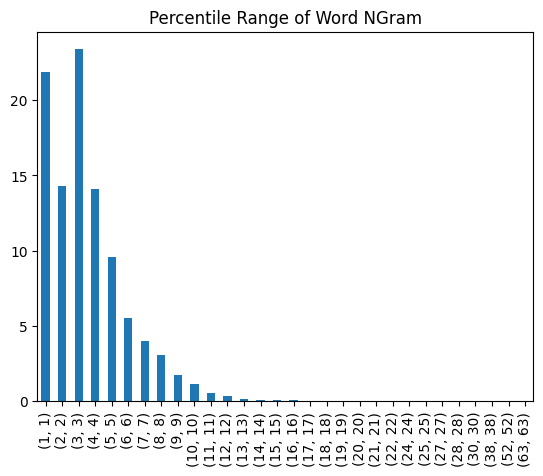

In [20]:
# getting the percentage of ngram for each cuisines
totalcount = df_ngram.sum().sum()
ngram_sum = df_ngram.sum().groupby(level=0).apply(lambda x: 100*x/float(totalcount))
ngram_sum.plot(kind="bar", title="Percentile Range of Word NGram")
ngram_sum[0:50]

In [21]:
# get a vector of cuisines and ingredients
index1 = {}
for key, value in cuisine_dict.items():
    index1[key] = dict(value)
df1 = pd.DataFrame.from_dict(index1, orient='index')
df1 = df1.fillna(0)
cuisine_labels = [key for key, value in df1.iterrows()]
ingredients_labels = list(df1.columns)

# calculating the table of probabilities for the cuisines
inst_count=df1.sum(axis='columns')
df1_prob= df1.div(inst_count,axis='rows')

In [22]:
import numpy as np
from sklearn.manifold import MDS

mds = MDS(n_components=2,  random_state=1)
X = mds.fit_transform(df1_prob.astype(np.float64))
x1 = X[:,0]
y1 = X[:,1]

c:\Users\Thomas Aujoux\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


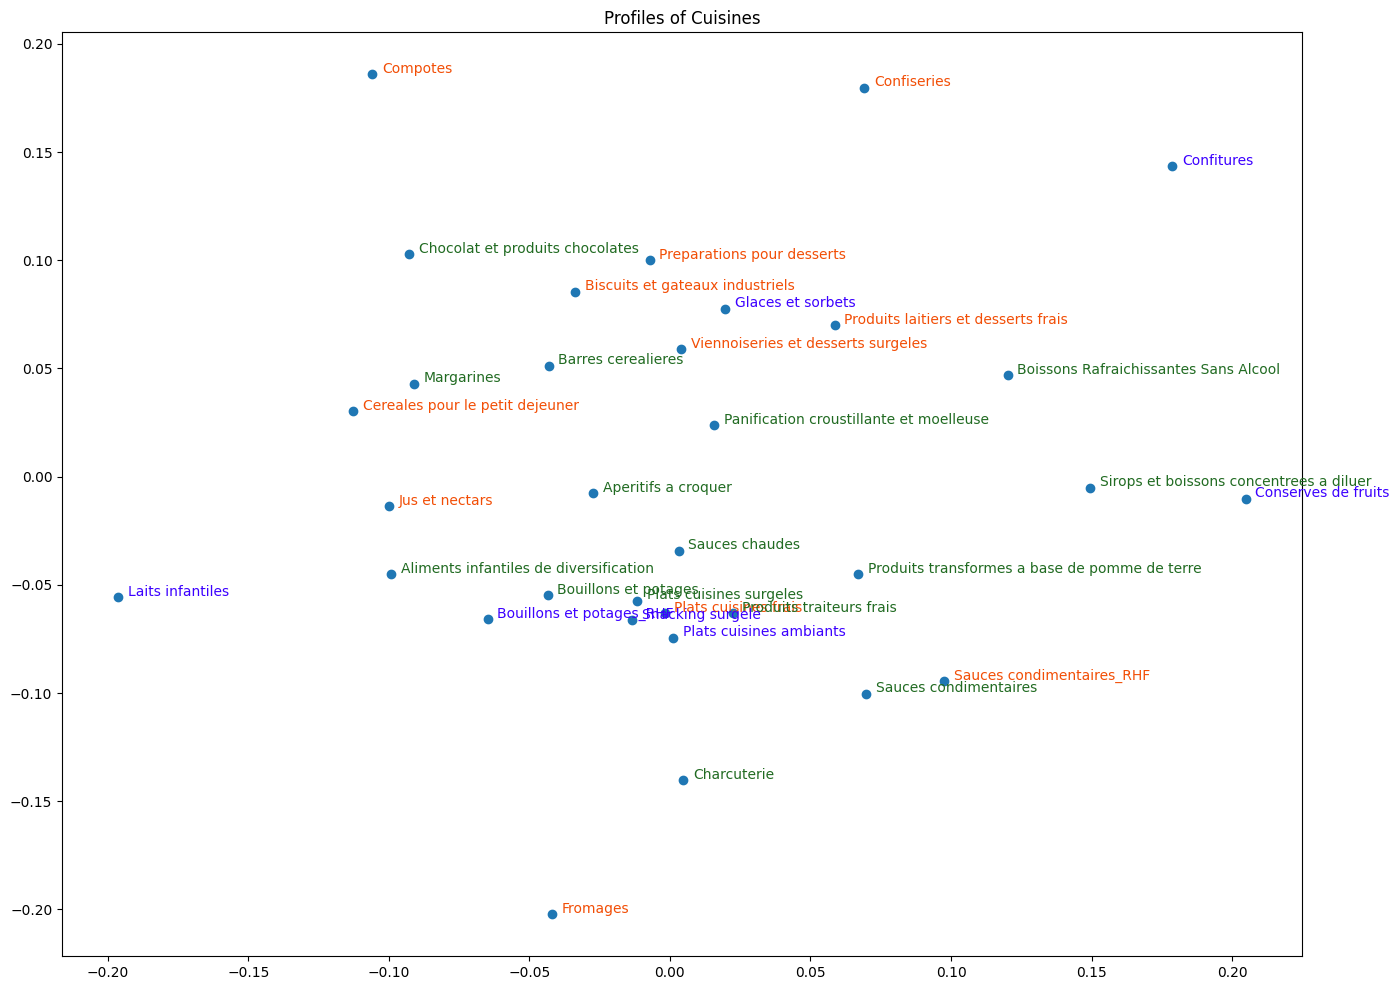

In [23]:
import matplotlib.pylab as pyl
pyl.rcParams['figure.figsize'] = (16.0, 12.0)

fig, ax = plt.subplots()
ax=plt.scatter(x1,y1)
plt.title('Profiles of Cuisines')

colors = {"Plats cuisines surgeles":    '#216b22',
"Glaces et sorbets":      '#3c00ff',
"Produits traiteurs frais": '#216b22',
"Biscuits et gateaux industriels"   :      '#f24e06',
"Plats cuisines frais":     '#f24e06',
"Snacking surgele":       '#3c00ff',
"Plats cuisines ambiants":        '#3c00ff',
"Produits laitiers et desserts frais":       '#f24e06',
"Charcuterie":     '#216b22',
"Panification croustillante et moelleuse":    '#216b22',
"Aperitifs a croquer":    '#216b22',
"Bouillons et potages":     '#216b22',
"Chocolat et produits chocolates":    '#216b22',
"Viennoiseries et desserts surgeles":         '#f24e06',
"Sauces condimentaires":    '#216b22',
"Boissons Rafraichissantes Sans Alcool":    '#216b22',
"Cereales pour le petit dejeuner":         '#f24e06',
"Aliments infantiles de diversification":    '#216b22',
"Produits transformes a base de pomme de terre":    '#216b22',
"Fromages":         '#f24e06',
"Barres cerealieres":    '#216b22',
"Jus et nectars":         '#f24e06',
"Confitures":      '#3c00ff',
"Preparations pour desserts":         '#f24e06',
"Sauces chaudes":    '#216b22',
"Laits infantiles":      '#3c00ff',
"Compotes":         '#f24e06',
"Margarines":    '#216b22',
"Sirops et boissons concentrees a diluer":    '#216b22',
"Sauces condimentaires_RHF":         '#f24e06',
"Bouillons et potages_RHF":      '#3c00ff',
"Conserves de fruits":      '#3c00ff',
"Confiseries":         '#f24e06',
}

for i, name in enumerate(cuisine_labels):
    plt.annotate(name, (x1[i], y1[i]), color=colors[name], xytext=(7,1), textcoords='offset points')
    
plt.show()

In [ ]:
df.groupby('')['B'].agg(lambda col: ''.join(col))

In [1]:
df

NameError: name 'df' is not defined

In [136]:
df.to_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\Exploratory_Data_Analysis\simply_clean_dict.csv')